In [3]:
import mysql.connector
from mysql.connector import errorcode
import pandas as pd
from sqlalchemy import create_engine

In [32]:
login='root'
mdp=''
machine='localhost'

def connexionBDD():
	try:
		cnx = mysql.connector.connect(user=login, password=mdp,
                                host=machine)
	except mysql.connector.Error as err:
		if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
			print("Something is wrong with your user name or password")
		elif err.errno == errorcode.ER_BAD_DB_ERROR:
			print("Database does not exist")
		else:
			print(err)
		cnx = None
	return cnx

# Selection de la base
def selectDB(cnx, bdd):
	cnx.database=bdd
# Requete simple sans parametre
def requeteSimple(cnx, requete):
	try:
		with cnx.cursor() as cursor:
			cursor.execute(requete)
			return cursor.fetchall()
	except mysql.connector.Error as err:
		print(err)
# Test d'execution du connector
def testExecutionConnector():
	cnx = connexionBDD()
	selectDB(cnx, 'population')
	rows = requeteSimple(cnx, 'SELECT * FROM departement')
	for rows in rows:
		print(rows)
	cnx.close()

def importCSV(fichierCSV, carSepCsv):
	dataFrame=pd.read_csv(fichierCSV, sep=carSepCsv)
	return dataFrame

def dataFrameToMySQLTable(database, tableName, dataFrame):
	engine = create_engine('mysql+mysqlconnector://' + login +':' + mdp +'@' + machine + '/' + database)
	retour = dataFrame.to_sql(tableName, engine, if_exists='replace')
	print("\n", retour, tableName, " creees\n")
	engine.dispose()

def CSVToMySQLTable(fileNameCSV, database, tableName, carSepCsv=';'):
	dataFrame=importCSV(fileNameCSV, carSepCsv)
	dataFrameToMySQLTable(database, tableName, dataFrame)

testExecutionConnector()
CSVToMySQLTable('c:/Users/anton/OneDrive/Documents/3emeAnnee/Verin/ProjetBDD_Groupe_AnnaAxelleNaïmaAntonin/populationSerieHistorique2020.csv', "population", "ville2")


('01', 'Ain', 84)
('02', 'Aisne', 32)
('03', 'Allier', 84)
('04', 'Alpes-de-Haute-Provence', 93)
('05', 'Hautes-Alpes', 93)
('06', 'Alpes-Maritimes', 93)
('07', 'Ardèche', 84)
('08', 'Ardennes', 44)
('09', 'Ariège', 76)
('10', 'Aube', 44)
('11', 'Aude', 76)
('12', 'Aveyron', 76)
('13', 'Bouches-du-Rhône', 93)
('14', 'Calvados', 28)
('15', 'Cantal', 84)
('16', 'Charente', 75)
('17', 'Charente-Maritime', 75)
('18', 'Cher', 24)
('19', 'Corrèze', 75)
('21', "Côte-d'Or", 27)
('22', "Côtes-d'Armor", 53)
('23', 'Creuse', 75)
('24', 'Dordogne', 75)
('25', 'Doubs', 27)
('26', 'Drôme', 84)
('27', 'Eure', 28)
('28', 'Eure-et-Loir', 24)
('29', 'Finistère', 53)
('2A', 'Corse-du-Sud', 94)
('2B', 'Haute-Corse', 94)
('30', 'Gard', 76)
('31', 'Haute-Garonne', 76)
('32', 'Gers', 76)
('33', 'Gironde', 75)
('34', 'Hérault', 76)
('35', 'Ille-et-Vilaine', 53)
('36', 'Indre', 24)
('37', 'Indre-et-Loire', 24)
('38', 'Isère', 84)
('39', 'Jura', 27)
('40', 'Landes', 75)
('41', 'Loir-et-Cher', 24)
('42', 'Loire'

C:\Users\anton\AppData\Local\Temp\ipykernel_27068\424363715.py:40: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  dataFrame=pd.read_csv(fichierCSV, sep=carSepCsv)



 -1 ville2  creees



In [31]:
# Supprimer plusieurs colonnes
def supprimerColonnes(cnx, table, colonnes):
    try:
        with cnx.cursor() as cursor:
            # Construction de la requête avec plusieurs colonnes
            colonnes_sql = ", ".join([f"DROP COLUMN `{col}`" for col in colonnes])
            query = f"ALTER TABLE `{table}` {colonnes_sql}"
            cursor.execute(query)
            cnx.commit()  # Appliquer les modifications
            print(f"Colonnes {', '.join(colonnes)} supprimées avec succès de la table {table}.")
    except mysql.connector.Error as err:
        print(f"Erreur lors de la suppression des colonnes : {err}")

# Programme principal
if __name__ == "__main__":
    # Connexion à la base de données
    cnx = connexionBDD()
    
    if cnx:  # Si la connexion est établie
        selectDB(cnx, 'population')  # Sélectionnez la base de données
        colonnes_a_supprimer = ['LIB_VAR_LONG', 'COD_VAR', 'LIB_VAR', 'TYPE_VAR', 'LONG_VAR', 'P20_LOG', 'P14_LOG', 'P09_LOG', 'D99_LOG', 'D68_LOG','D75_LOG','D82_LOG','D90_LOG']
        #colonnes_a_supprimer = ['index', 'nomDepart', 'codeDepart']
        supprimerColonnes(cnx, 'region', colonnes_a_supprimer)  # Nom de la table et des colonnes à supprimer
        cnx.close()  # Fermer la connexion après modification
    else:
        print("Impossible de se connecter à la base de données.")


Erreur lors de la suppression des colonnes : 1091 (42000): Ne peut effacer (DROP) 'LIB_VAR_LONG'. Vérifiez s'il existe


In [30]:
# Charger les deux fichiers CSV
villes = pd.read_csv("c:/Users/anton/OneDrive/Documents/3emeAnnee/Verin/ProjetBDD_Groupe_AnnaAxelleNaïmaAntonin/populationSerieHistorique2020.csv", sep=';')  # Fichier contenant noms de ville et code postal
departements = pd.read_csv("c:/Users/anton/OneDrive/Documents/3emeAnnee/Verin/ProjetBDD_Groupe_AnnaAxelleNaïmaAntonin/populationDepartementsFrance.csv", sep=';')  # Fichier contenant code département et autres infos

if 'CODGEO' in villes.columns:
    # Convertir 'CODGEO' en chaîne et ajouter un zéro devant les codes à 4 chiffres
    villes['CODGEO'] = villes['CODGEO'].apply(lambda x: str(x).zfill(5))
else:
    print("Erreur : La colonne 'CODGEO' est introuvable dans le fichier des villes.")

# Afficher les premières lignes pour vérifier
print(villes.head())

# Vérifier si le code commence par "97" (DOM-TOM), et dans ce cas, prendre les 3 premiers caractères
def extraire_code_departement(CODGEO):
    CODGEO = str(CODGEO)
    if CODGEO.startswith('97'):  # DOM-TOM, prendre 3 premiers caractères
        return CODGEO[:3]
    else:  # Autres départements, prendre 2 premiers caractères
        return CODGEO[:2]
    
villes['code_departement'] = villes['CODGEO'].apply(extraire_code_departement)

print(villes['code_departement'].tail())
print(villes['CODGEO'].tail())


  CODGEO  P20_POP  P14_POP  P09_POP  D99_POP  D90_POP  D82_POP  D75_POP  \
0  01001      806      767      787      728      579      477      368   
1  01002      262      239      207      168      159      136      106   
2  01004    14288    14022    13350    11436    10455     9737     9550   
3  01005     1782     1627     1592     1408     1156      848      756   
4  01006      113      109      120       86       76       65       82   

   D68_POP  SUPERF  ...  DECE7582  DECE6875      P20_LOG      P14_LOG  \
0      347   15.95  ...      31.0      25.0   366.185065   342.734735   
1       88    9.15  ...      10.0      13.0   175.308079   161.160233   
2     8949   24.60  ...     607.0     645.0  7648.878620  6838.354371   
3      627   15.92  ...      44.0      57.0   832.000000   661.760173   
4      108    5.88  ...      14.0      18.0    75.555556    71.518182   

       P09_LOG  D99_LOG  D90_LOG  D82_LOG  D75_LOG  D68_LOG  
0   337.312666      289      238    208.0    175

C:\Users\anton\AppData\Local\Temp\ipykernel_27068\2529441490.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  villes = pd.read_csv("c:/Users/anton/OneDrive/Documents/3emeAnnee/Verin/ProjetBDD_Groupe_AnnaAxelleNaïmaAntonin/populationSerieHistorique2020.csv", sep=';')  # Fichier contenant noms de ville et code postal


In [4]:
import pandas as pd
from sqlalchemy import create_engine

login = 'root'
mdp = ''
machine = 'localhost'
database = 'population'

def dataFrameToMySQLTable(database, tableName, dataFrame):
    engine = create_engine(f'mysql+mysqlconnector://{login}:{mdp}@{machine}/{database}')
    dataFrame.to_sql(tableName, engine, if_exists='replace', index=False)
    print(f"Table '{tableName}' créée ou mise à jour avec succès.")
    engine.dispose()

def mergeAndSaveToMySQL(csv1, csv2, key1, key2, database, tableName, carSepCsv=';'):
    df1 = pd.read_csv(csv1, sep=carSepCsv)
    df2 = pd.read_csv(csv2, sep=carSepCsv)
    
    print("Colonnes CSV1 :", df1.columns)
    print("Colonnes CSV2 :", df2.columns)
    
    # Renommer clé pour correspondance
    df2.rename(columns={key2: key1}, inplace=True)
    
    # Fusionner
    merged_df = pd.merge(df1, df2, on=key1, how='inner')
    
    # Envoi à MySQL
    dataFrameToMySQLTable(database, tableName, merged_df)

if __name__ == "__main__":
    mergeAndSaveToMySQL(
        csv1='c:/Users/anton/OneDrive/Documents/3emeAnnee/Verin/ProjetBDD_Groupe_AnnaAxelleNaïmaAntonin/populationSerieHistorique2020.csv',
        csv2='c:/Users/anton/OneDrive/Documents/3emeAnnee/Verin/ProjetBDD_Groupe_AnnaAxelleNaïmaAntonin/populationMetaDataSerieHistorique2020.csv',
        key1='CODGEO',  # Modifier selon vos fichiers
        key2='COD_MOD',   # Modifier selon vos fichiers
        database="population",
        tableName="ville"
    )




C:\Users\anton\AppData\Local\Temp\ipykernel_15420\3070240707.py:16: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(csv1, sep=carSepCsv)


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 1336: invalid continuation byte

   population               nomCommune nomDepart             nomRegion
0         806  L'Abergement-Clémenciat       Ain  Auvergne-Rhône-Alpes
1         262    L'Abergement-de-Varey       Ain  Auvergne-Rhône-Alpes
2       14288        Ambérieu-en-Bugey       Ain  Auvergne-Rhône-Alpes
3        1782      Ambérieux-en-Dombes       Ain  Auvergne-Rhône-Alpes
4         113                  Ambléon       Ain  Auvergne-Rhône-Alpes


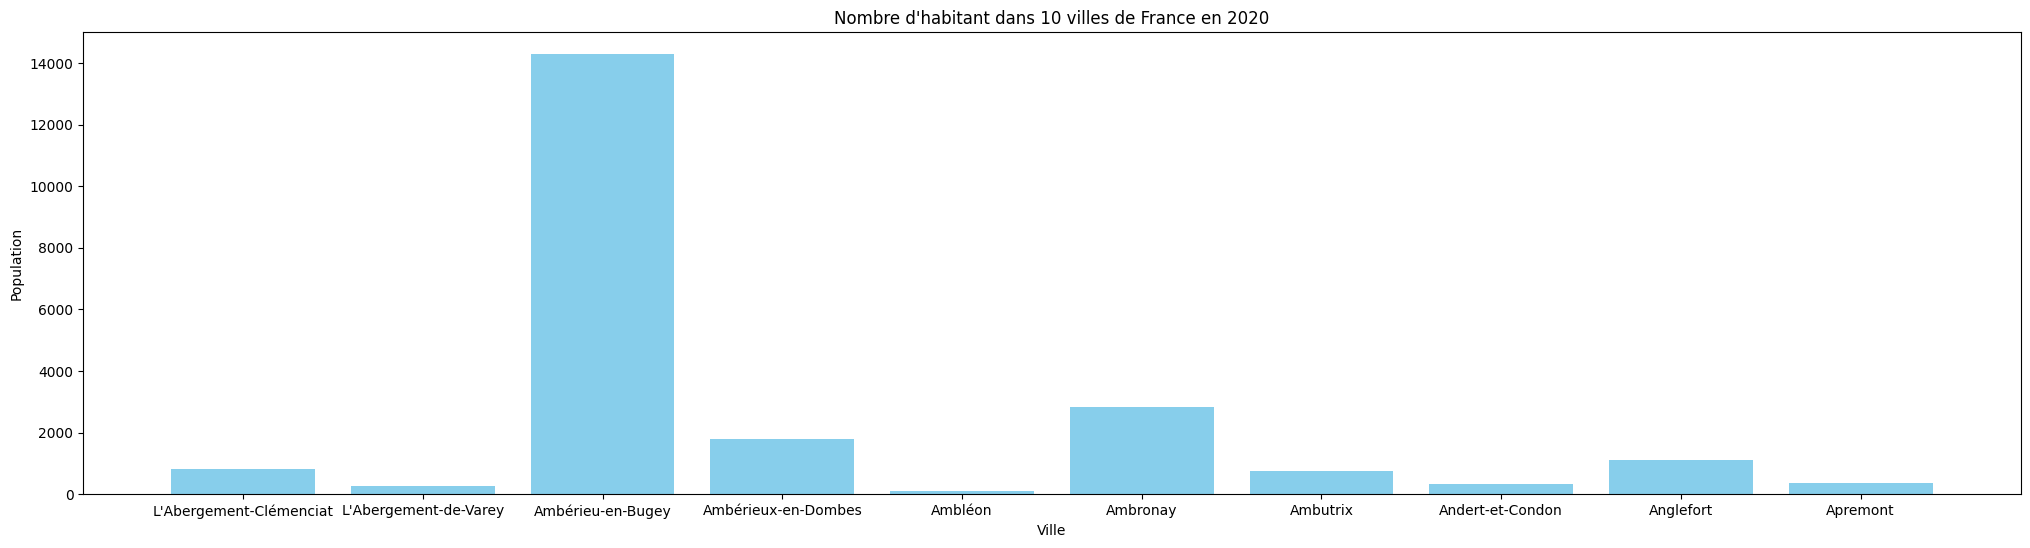

In [5]:
import matplotlib.pyplot as plt
# Connexion à la base de données
cnx = mysql.connector.connect(user=login, password=mdp, host=machine)
engine = create_engine('mysql+mysqlconnector://' + login + ':' + mdp + '@' + machine + '/' + "population")

# Exécution d'une requête SQL
question1 = """
SELECT p.population, c.nomCommune, d.nomDepart, r.nomRegion 
FROM Population p
	JOIN Commune c ON p.nomCommune = c.codeCommune
	JOIN Departement d ON c.code_departement = d.codeDepart
	JOIN Region r ON d.codeRegion = r.codeRegion
WHERE NOT (
    (c.codeCommune BETWEEN '75101' AND '75120') -- Arrondissements de Paris
    OR (c.codeCommune BETWEEN '13201' AND '13216') -- Arrondissements de Marseille
    OR (c.codeCommune BETWEEN '69381' AND '69389') -- Arrondissements de Lyon
)
AND p.annee = '2020'
GROUP BY c.nomCommune, d.nomDepart, r.nomRegion;
"""
data = pd.read_sql_query(question1, engine)
print(data.head())

# Création d'un graphique
plt.figure(figsize=(25,6))
plt.bar(data['nomCommune'][:10], data['population'][:10], color="skyblue")
plt.xlabel('Ville')
plt.ylabel("Population")
plt.title("Nombre d'habitant dans 10 villes de France en 2020")
plt.show()

   annee  population_totale  population_millions
0   1968         54805712.0            54.805712
1   1975         57429210.0            57.429210
2   1982         59033316.0            59.033316
3   1990         61409119.0            61.409119
4   1999         63519029.0            63.519029


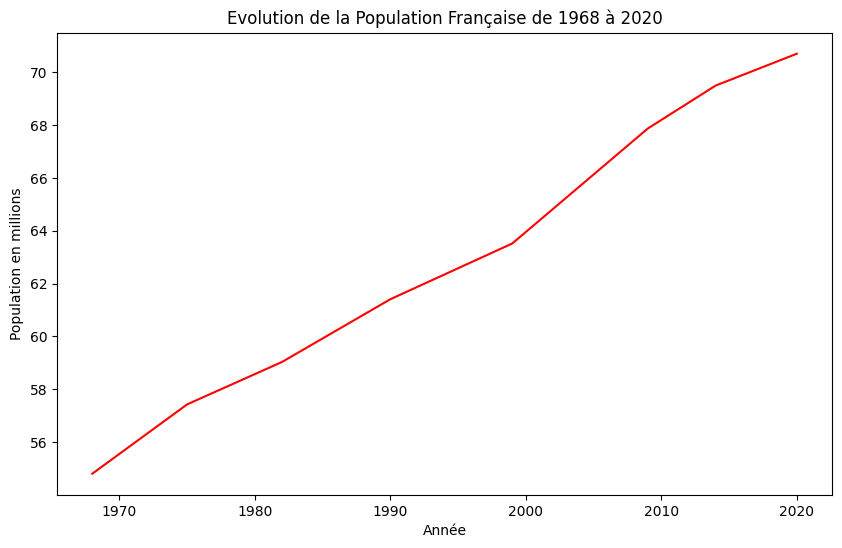

In [80]:
# Exécution d'une requête SQL
question2= """
SELECT p.annee, SUM(p.population) AS population_totale
FROM Population p 
WHERE p.annee BETWEEN 1968 AND 2020
GROUP BY p.annee
ORDER BY p.annee;
"""
data = pd.read_sql_query(question2, engine)
data['population_millions'] = data['population_totale'] / 1e6
print(data.head())

# Création d'un graphique
plt.figure(figsize=(10,6))
plt.plot(data['annee'], data['population_millions'], color="red")
plt.xlabel('Année')
plt.ylabel("Population en millions")
plt.title("Evolution de la Population Française de 1968 à 2020")
plt.show()

                 nomDepart  population_par_dep  population_millier
0                      Ain            657856.0             657.856
1                    Aisne            529374.0             529.374
2                   Allier            335628.0             335.628
3  Alpes-de-Haute-Provence            165451.0             165.451
4             Hautes-Alpes            140605.0             140.605


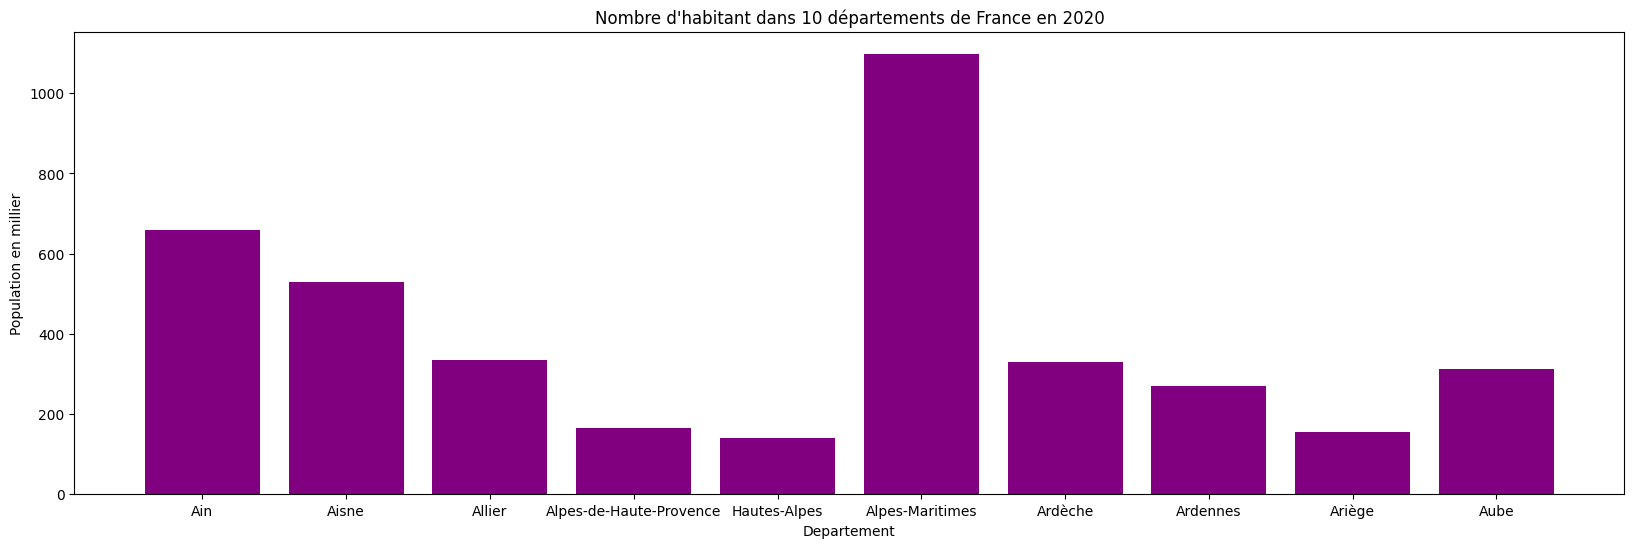

                    nomRegion  population_par_reg  population_millions
0        Auvergne-Rhône-Alpes          96943824.0            96.943824
1             Hauts-de-France          29988670.0            29.988670
2  Provence-Alpes-Côte d'Azur          30591996.0            30.591996
3                   Grand Est          55626510.0            55.626510
4                   Occitanie          77661597.0            77.661597


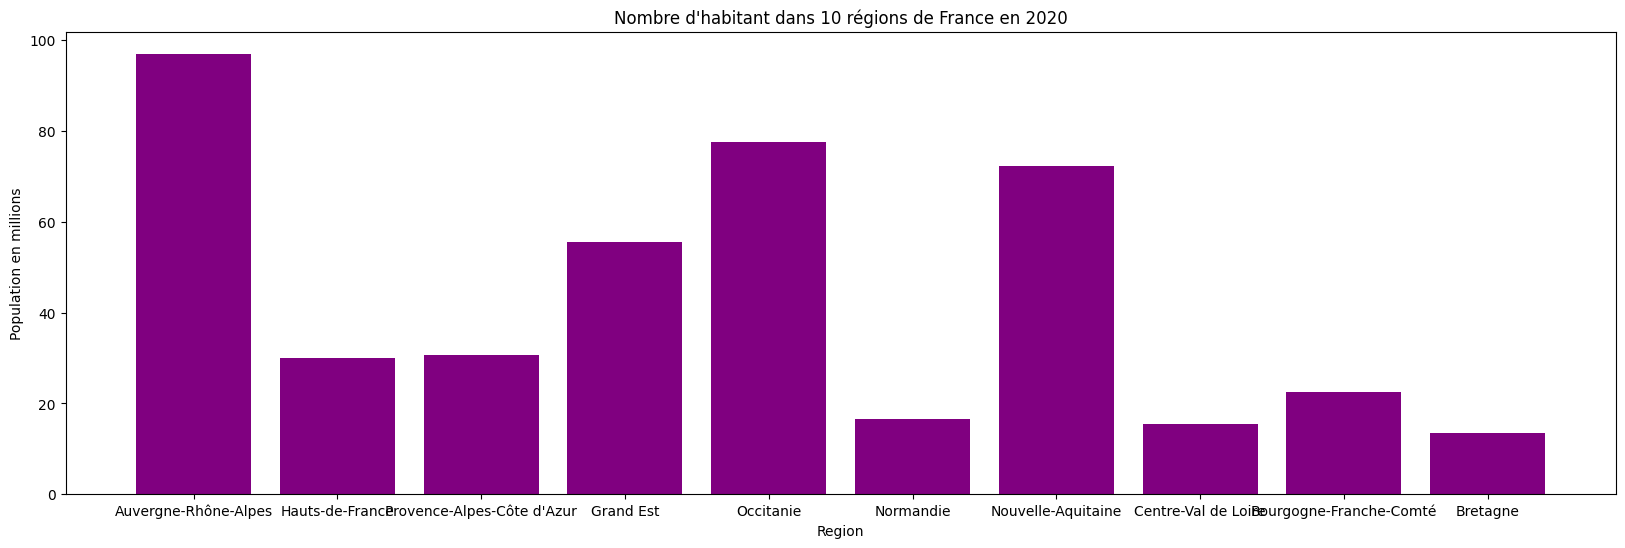

In [81]:
question3 = """
SELECT d.nomDepart, SUM(p.population) AS population_par_dep
FROM Population p
	JOIN Commune c ON c.codeCommune = p.nomCommune
	JOIN Departement d ON c.code_departement= d.codeDepart
WHERE NOT (
    (c.codeCommune BETWEEN '75101' AND '75120') -- Arrondissements de Paris
    OR (c.codeCommune BETWEEN '13201' AND '13216') -- Arrondissements de Marseille
    OR (c.codeCommune BETWEEN '69381' AND '69389') -- Arrondissements de Lyon
)
AND p.annee = '2020'
GROUP BY d.nomDepart;
"""
data = pd.read_sql_query(question3, engine)
data['population_millier'] = data['population_par_dep'] / 1e3
print(data.head())

# Création d'un graphique
plt.figure(figsize=(20,6))
plt.bar(data['nomDepart'][:10], data['population_millier'][:10], color="purple")
plt.xlabel('Departement')
plt.ylabel("Population en millier")
plt.title("Nombre d'habitant dans 10 départements de France en 2020")
plt.show()

query3bis = """
SELECT r.nomRegion, SUM(p.population) AS population_par_reg
FROM Population p
	JOIN Commune c ON c.codeCommune = p.nomCommune
	JOIN Departement d ON c.code_departement= d.codeDepart
	JOIN Region r ON d.codeRegion = r.codeRegion
WHERE NOT (
    (c.codeCommune BETWEEN '75101' AND '75120') -- Arrondissements de Paris
    OR (c.codeCommune BETWEEN '13201' AND '13216') -- Arrondissements de Marseille
    OR (c.codeCommune BETWEEN '69381' AND '69389') -- Arrondissements de Lyon
)
AND p.annee = '2020'
GROUP BY r.nomRegion;
"""
data = pd.read_sql_query(query3bis, engine)
data['population_millions'] = data['population_par_reg'] / 1e6
print(data.head())

# Création d'un graphique
plt.figure(figsize=(20,6))
plt.bar(data['nomRegion'][:10], data['population_millions'][:10], color="purple")
plt.xlabel('Region')
plt.ylabel("Population en millions")
plt.title("Nombre d'habitant dans 10 régions de France en 2020")
plt.show()

  nomCommune  population_paris_total  population_millions
0      Paris               2145906.0             2.145906
   population_totale_paris  population_millions_bis
0                2147732.0                 2.147732


Text(0.5, 1.0, 'Comparaison de la Population parisienne et de ses arrondissements en 2020')

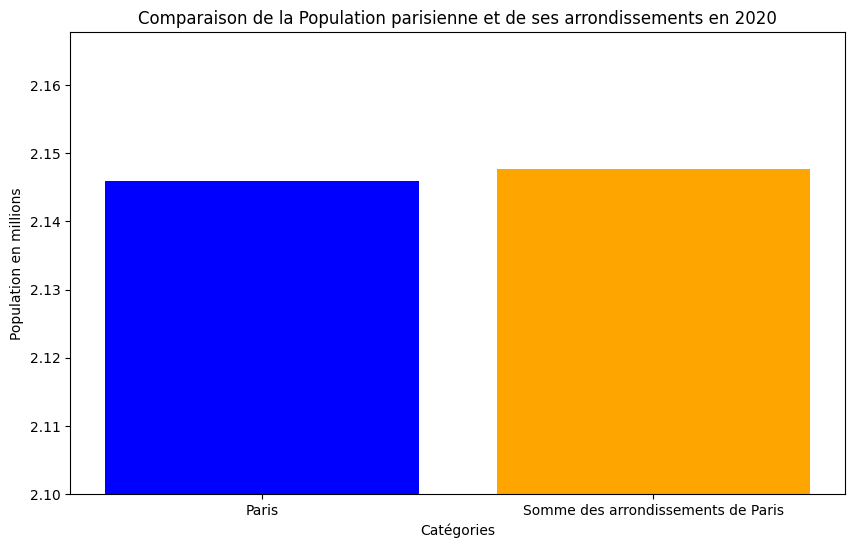

In [82]:
# Exécution d'une requête SQL
question4= """
SELECT c.nomCommune, SUM(p.population) AS population_paris_total -- au total 
FROM Population p
	JOIN Commune c ON p.nomCommune = c.codeCommune
WHERE c.nomCommune = 'Paris' AND c.codeCommune NOT LIKE '751%' -- exclu les arrondissements de Paris
  AND p.annee = '2020'
GROUP BY c.nomCommune;
"""
data = pd.read_sql_query(question4, engine)
data['population_millions'] = data['population_paris_total'] / 1e6
print(data.head())

question4bis= """
SELECT SUM(p.population) AS population_totale_paris
FROM Population p
    JOIN Commune c ON p.nomCommune = c.codeCommune
WHERE c.nomCommune LIKE 'Paris%' -- Sélectionne tous les arrondissements de Paris
    AND c.nomCommune != 'Paris'
    AND p.annee = 2020;
"""
databis = pd.read_sql_query(question4bis, engine)
databis['population_millions_bis'] = databis['population_totale_paris'] / 1e6
print(databis.head())

# Création d'un graphique
plt.figure(figsize=(10, 6))
labels = ['Paris', 'Somme des arrondissements de Paris']
values = [data['population_millions'].iloc[0], databis['population_millions_bis'].iloc[0]]
plt.ylim(2.1, max(values) + 0.02)

plt.bar(labels, values, color=['blue', 'orange'])
plt.xlabel('Catégories')
plt.ylabel("Population en millions")
plt.title("Comparaison de la Population parisienne et de ses arrondissements en 2020")

        nomCommune  croissance_population
0            Cergy               0.062519
1       Guyancourt               0.058895
2  Jouy-le-Moutier               0.054570
3       Montévrain               0.051468
4        Lieusaint               0.050987


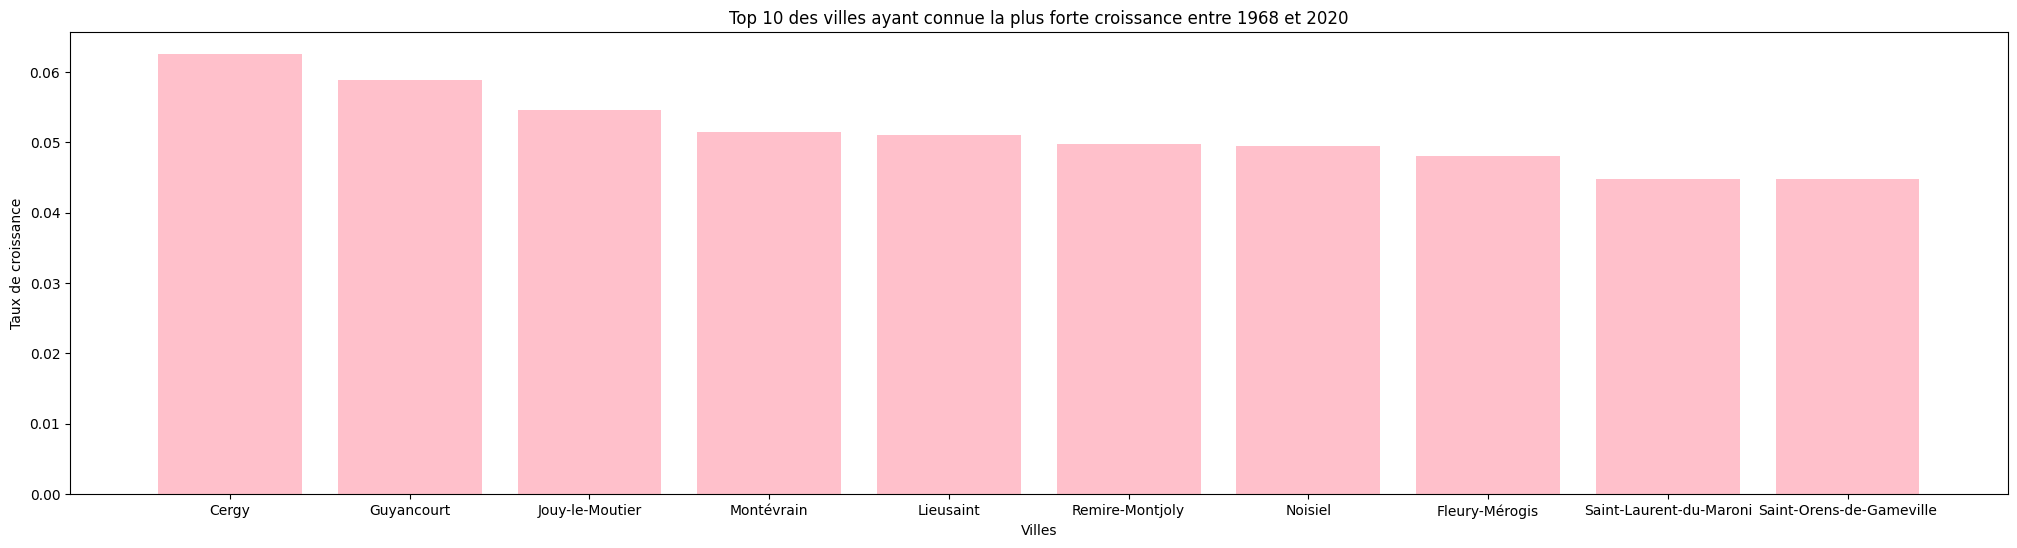

In [83]:
#Il existe de nombreuse formule pour calculer une croissance, on peut faire une différence de population, 
# un quotient de type (Fin-Initial)/Initial ou bien le TCAM c'est ce dernier que nous avons choisi d'utiliser car il ne favorise ni les grandes ni les petites villes dans le calcul de la croissance 
# (on ignore toutefois les villes de moins de 2000 habitants en 1968 car elles ne peuvent pas être considérées comme des "unités urbaines" selon la définition officielle fourni par l'INSEE) :
question5Ville= """
SELECT c.nomCommune, 
       (POWER(
           SUM(CASE WHEN p.annee = 2020 THEN p.population ELSE 0 END) /
           SUM(CASE WHEN p.annee = 1968 THEN p.population ELSE 0 END), 
           1.0 / (2020 - 1968)
       ) - 1) AS croissance_population
FROM Population p
JOIN Commune c ON p.nomCommune = c.codeCommune
WHERE p.annee BETWEEN 1968 AND 2020
GROUP BY c.nomCommune
HAVING SUM(CASE WHEN p.annee = 1968 THEN p.population ELSE 0 END) >= 1000
ORDER BY croissance_population DESC
LIMIT 10;
"""
data = pd.read_sql_query(question5Ville, engine)
#data['population_millions'] = data['population_totale'] / 1e6
print(data.head())

# Création d'un graphique
plt.figure(figsize=(25,6))
plt.bar(data['nomCommune'][:10], data['croissance_population'][:10], color="pink")
plt.xlabel('Villes')
plt.ylabel("Taux de croissance")
plt.title("Top 10 des villes ayant connue la plus forte croissance entre 1968 et 2020")
plt.show()

        nomDepart  croissance_population
0          Guyane               0.036415
1  Seine-et-Marne               0.016683
2    Haute-Savoie               0.015334
3      La Réunion               0.014109
4   Haute-Garonne               0.013898


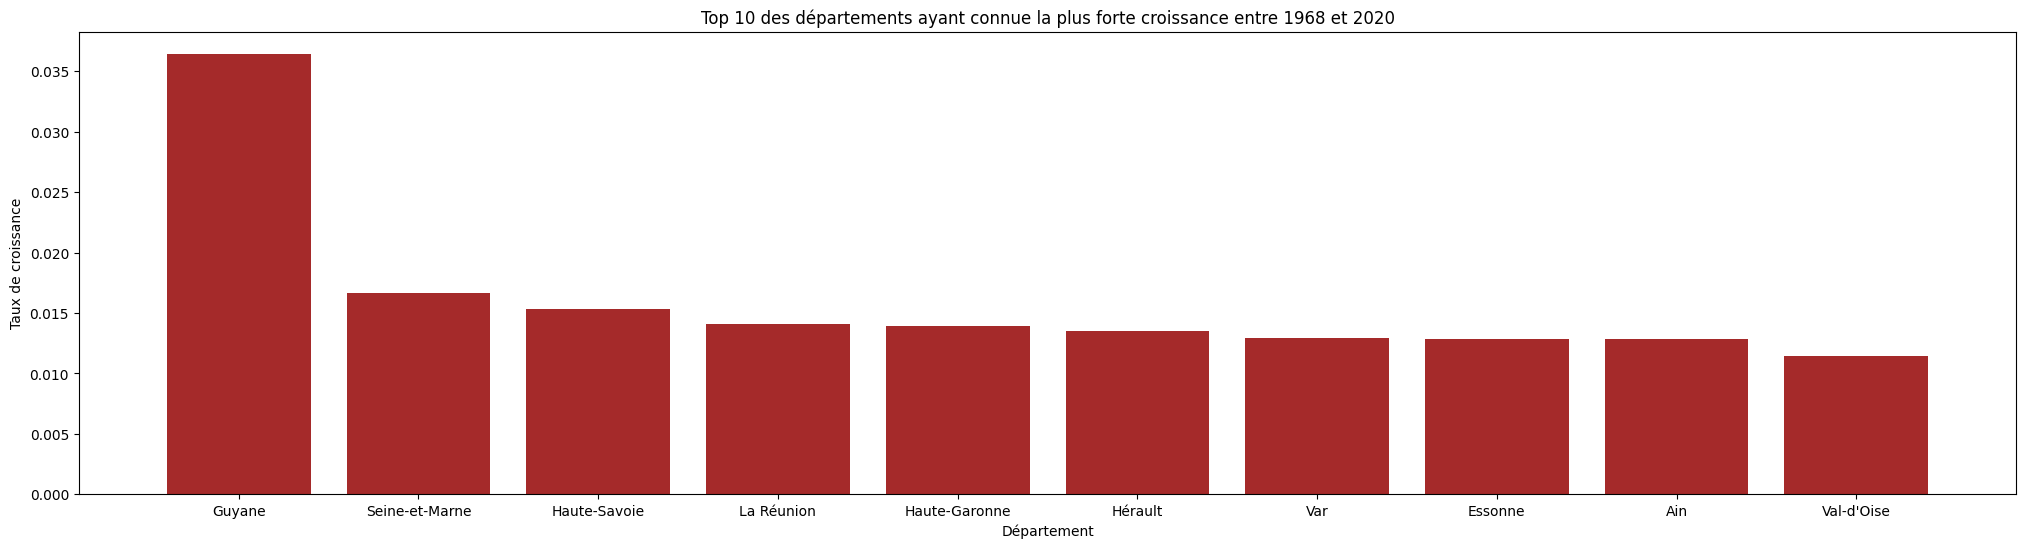

In [ ]:
question5Depart = """
SELECT d.nomDepart, 
       (POWER(
           SUM(CASE WHEN p.annee = 2020 THEN p.population ELSE 0 END) /
           SUM(CASE WHEN p.annee = 1968 THEN p.population ELSE 0 END), 
           1.0 / (2020 - 1968)
       ) - 1) AS croissance_population
FROM Population p
JOIN Commune c ON p.nomCommune = c.codeCommune
JOIN Departement d ON c.code_departement = d.codeDepart
WHERE NOT (
    (c.codeCommune BETWEEN '75101' AND '75120')  -- Exclure Paris
    OR (c.codeCommune BETWEEN '13201' AND '13216')  -- Exclure Marseille
    OR (c.codeCommune BETWEEN '69381' AND '69389')  -- Exclure Lyon
) 
AND p.annee BETWEEN 1968 AND 2020
GROUP BY d.nomDepart
ORDER BY croissance_population DESC
LIMIT 10;
"""
data = pd.read_sql_query(question5Depart, engine)
print(data.head())

# Création d'un graphique
plt.figure(figsize=(25,6))
plt.bar(data['nomDepart'][:10], data['croissance_population'][:10], color="brown")
plt.xlabel('Département')
plt.ylabel("Taux de croissance")
plt.title("Top 10 des départements ayant connue la plus forte croissance entre 1968 et 2020")
plt.show()

                    nomRegion  croissance_population
0                      Guyane               0.036415
1                  La Réunion               0.014109
2                       Corse               0.009962
3  Provence-Alpes-Côte d'Azur               0.008408
4                   Occitanie               0.008272


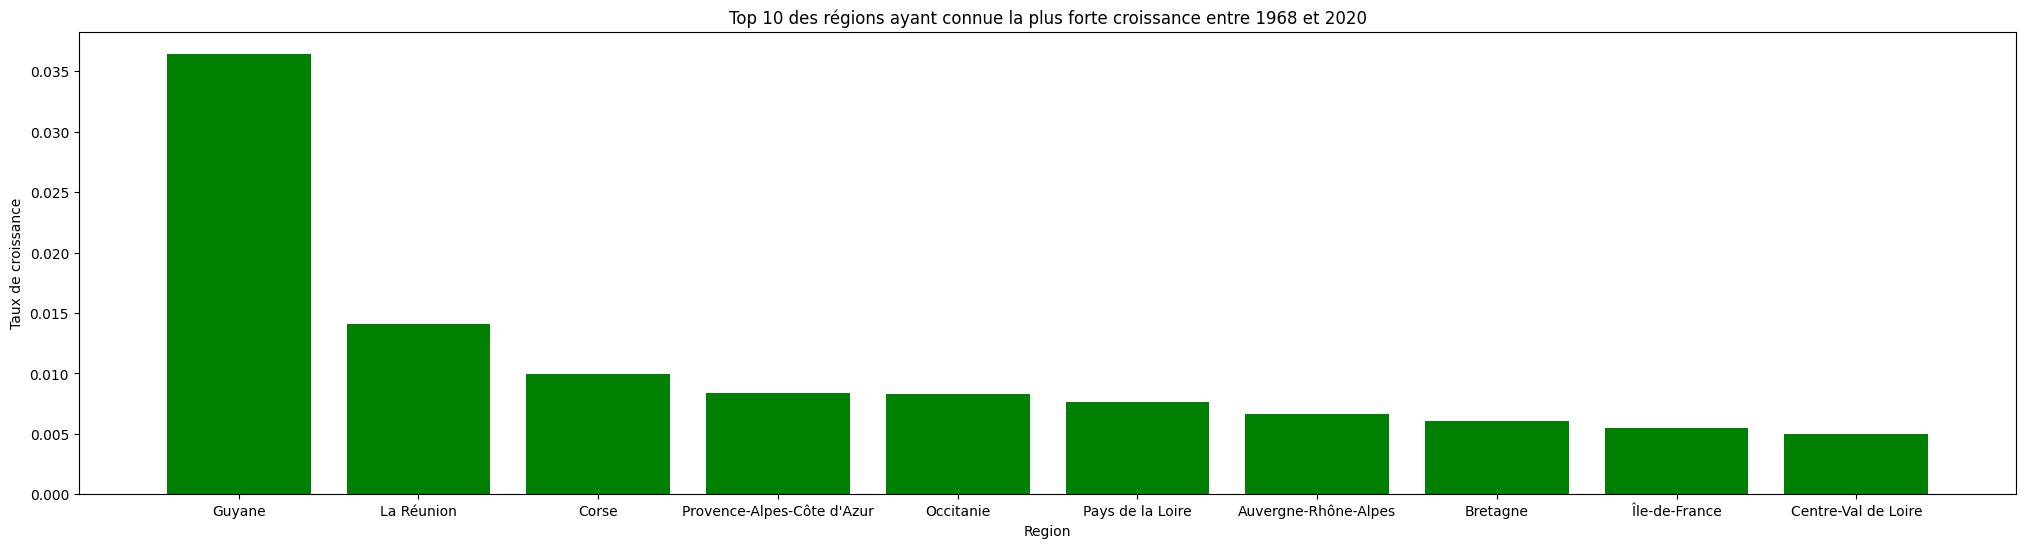

In [85]:
question5Region = """
SELECT r.nomRegion, 
       (POWER(
           SUM(CASE WHEN p.annee = 2020 THEN p.population ELSE 0 END) /
           SUM(CASE WHEN p.annee = 1968 THEN p.population ELSE 0 END), 
           1.0 / (2020 - 1968)
       ) - 1) AS croissance_population
FROM Population p
JOIN Commune c ON p.nomCommune = c.codeCommune
JOIN Departement d ON c.code_departement = d.codeDepart
JOIN Region r ON d.codeRegion = r.codeRegion
WHERE NOT (
    (c.codeCommune BETWEEN '75101' AND '75120')
    OR (c.codeCommune BETWEEN '13201' AND '13216') 
    OR (c.codeCommune BETWEEN '69381' AND '69389') 
) 
AND p.annee BETWEEN 1968 AND 2020
GROUP BY r.nomRegion
ORDER BY croissance_population DESC
LIMIT 10;
"""
data = pd.read_sql_query(question5Region, engine)
#data['population_millions'] = data['population_totale'] / 1e6
print(data.head())

# Création d'un graphique
plt.figure(figsize=(25,6))
plt.bar(data['nomRegion'][:10], data['croissance_population'][:10], color="green")
plt.xlabel('Region')
plt.ylabel("Taux de croissance")
plt.title("Top 10 des régions ayant connue la plus forte croissance entre 1968 et 2020")
plt.show()

    nomCommune  total_naissances
0        Paris          1.645891
1    Marseille          0.607953
2         Lyon          0.359039
3     Toulouse          0.296154
4  Saint-Denis          0.234368
  nomCommune  total_deces
0      Paris     1.020509
1  Marseille     0.442758
2       Nice     0.222301
3       Lyon     0.212134
4   Toulouse     0.152034


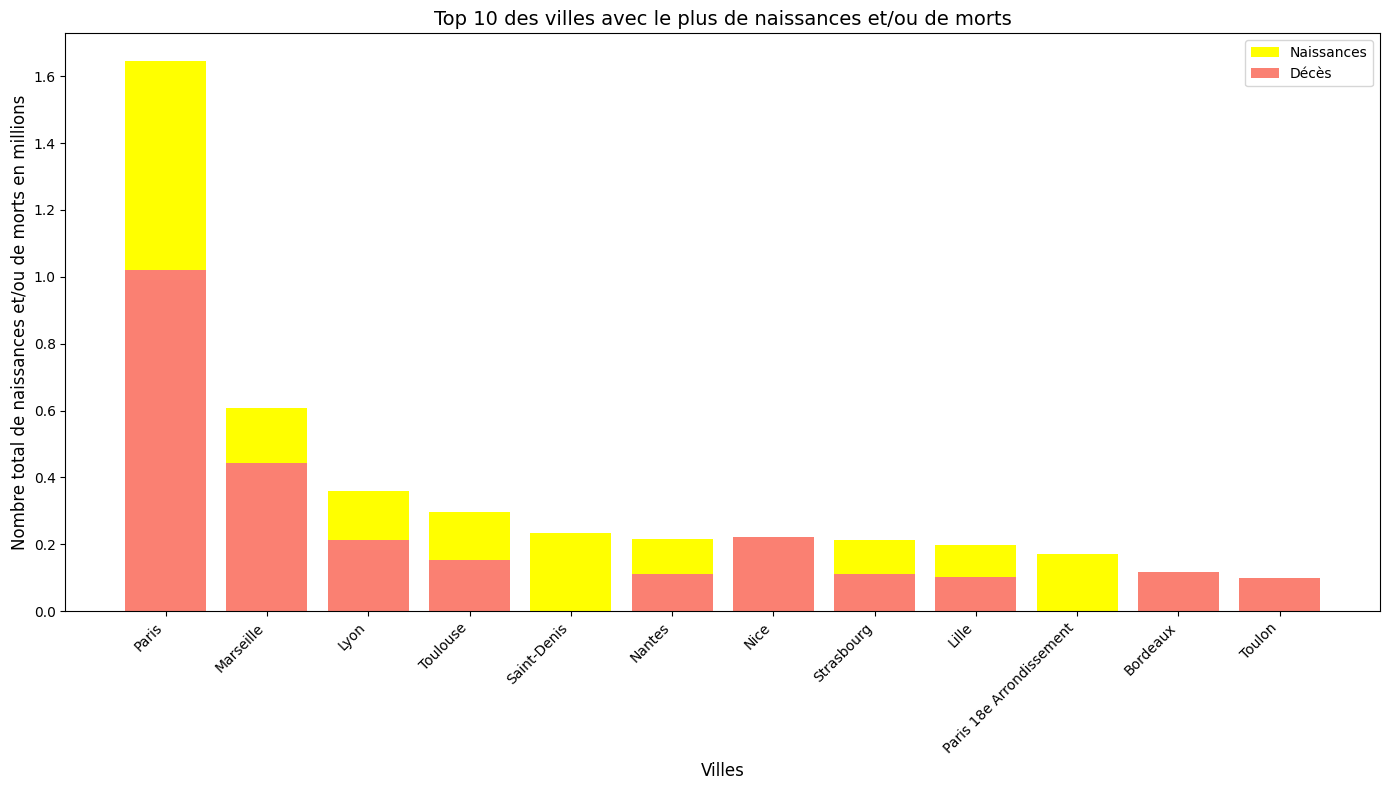

In [ ]:
question6VilleNaissance= """
SELECT c.nomCommune, SUM(e.nombre) AS total_naissances
FROM Commune c
	LEFT JOIN Evenement e ON c.codeCommune = e.nomCommune
WHERE e.categorie = 'Naissance'
AND e.periode IN ('1968-1975', '1975-1982', '1982-1990', '1990-1999', '1999-2009', '2009-2014', '2014-2020') 
GROUP BY c.nomCommune
ORDER BY total_naissances DESC
LIMIT 10;
"""
dataNaissance = pd.read_sql_query(question6VilleNaissance, engine)
dataNaissance['total_naissances'] = dataNaissance['total_naissances'] / 1e6
print(dataNaissance.head())

question6VilleMort= """
SELECT c.nomCommune, SUM(e.nombre) AS total_deces
FROM Commune c
	LEFT JOIN Evenement e ON c.codeCommune = e.nomCommune
WHERE e.categorie = 'Deces'
AND e.periode IN ('1968-1975', '1975-1982', '1982-1990', '1990-1999', '1999-2009', '2009-2014', '2014-2020') 
GROUP BY c.nomCommune
ORDER BY total_deces DESC
LIMIT 10;
"""
dataMort = pd.read_sql_query(question6VilleMort, engine)
dataMort['total_deces'] = dataMort['total_deces'] / 1e6
print(dataMort.head())

# Création d'un graphique
fig, ax = plt.subplots(figsize=(14, 8))

# Bar plot pour les naissances
ax.bar(dataNaissance['nomCommune'], dataNaissance['total_naissances'], color='yellow', label='Naissances')
# Bar plot pour les décès
ax.bar(dataMort['nomCommune'], dataMort['total_deces'], color='salmon', label='Décès')

# Ajout des labels et du titre
ax.set_xlabel('Villes', fontsize=12)
ax.set_ylabel('Nombre total de naissances et/ou de morts en millions', fontsize=12)
ax.set_title("Top 10 des villes avec le plus de naissances et/ou de morts", fontsize=14)
# Rotation des labels de l'axe des x pour meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Ajouter une légende pour clarifier les couleurs
ax.legend()

# Affichage du graphique
plt.tight_layout()
plt.show()

           nomDepart  total_naissances
0               Nord          2.053491
1              Paris          1.645891
2  Seine-Saint-Denis          1.289996
3   Bouches-du-Rhône          1.232697
4              Rhône          1.225742
          nomDepart  total_deces
0              Nord     1.249577
1             Paris     1.020509
2  Bouches-du-Rhône     0.868529
3     Pas-de-Calais     0.756096
4             Rhône     0.636417


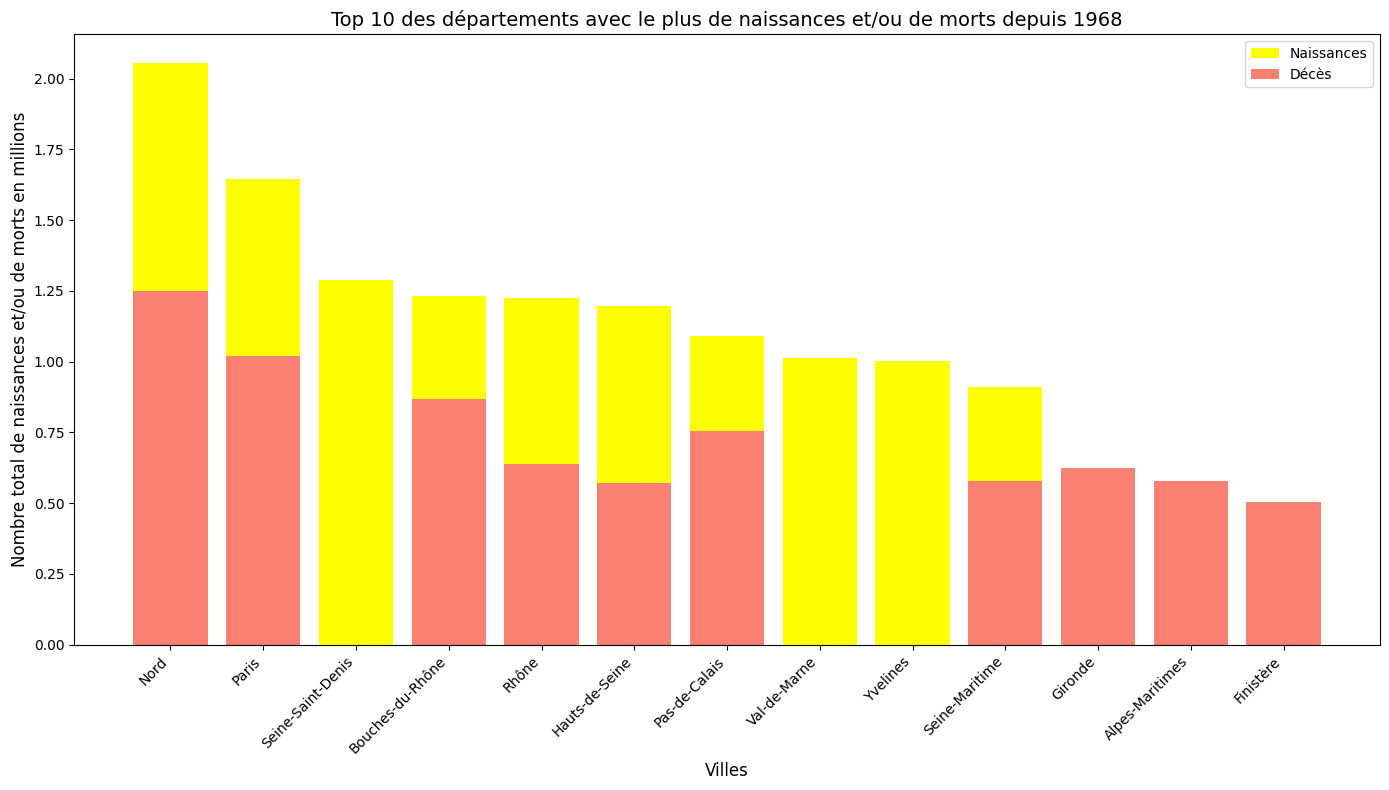

In [24]:
question6DepartNaissance= """
SELECT d.nomDepart, SUM(e.nombre) AS total_naissances
FROM Departement d
	LEFT JOIN Commune c ON d.codeDepart = c.code_departement
	LEFT JOIN Evenement e ON c.codeCommune = e.nomCommune
WHERE NOT (
    (c.codeCommune BETWEEN '75101' AND '75120') -- Arrondissements de Paris
    OR (c.codeCommune BETWEEN '13201' AND '13216') -- Arrondissements de Marseille
    OR (c.codeCommune BETWEEN '69381' AND '69389') -- Arrondissements de Lyon
) 
AND e.categorie = 'Naissance'
AND e.periode IN ('1968-1975', '1975-1982', '1982-1990', '1990-1999', '1999-2009', '2009-2014', '2014-2020') 
GROUP BY d.nomDepart
ORDER BY total_naissances DESC
LIMIT 10;
"""
dataNaissance = pd.read_sql_query(question6DepartNaissance, engine)
dataNaissance['total_naissances'] = dataNaissance['total_naissances'] / 1e6
print(dataNaissance.head())

question6DepartMort= """
SELECT d.nomDepart, SUM(e.nombre) AS total_deces
FROM Departement d
	LEFT JOIN Commune c ON d.codeDepart = c.code_departement
	LEFT JOIN Evenement e ON c.codeCommune = e.nomCommune
WHERE NOT (
    (c.codeCommune BETWEEN '75101' AND '75120') -- Arrondissements de Paris
    OR (c.codeCommune BETWEEN '13201' AND '13216') -- Arrondissements de Marseille
    OR (c.codeCommune BETWEEN '69381' AND '69389') -- Arrondissements de Lyon
) 
AND e.categorie = 'Deces'
AND e.periode IN ('1968-1975', '1975-1982', '1982-1990', '1990-1999', '1999-2009', '2009-2014', '2014-2020') 
GROUP BY d.nomDepart
ORDER BY total_deces DESC
LIMIT 10;
"""
dataMort = pd.read_sql_query(question6DepartMort, engine)
dataMort['total_deces'] = dataMort['total_deces'] / 1e6
print(dataMort.head())

# Création d'un graphique
fig, ax = plt.subplots(figsize=(14, 8))

# Bar plot pour les naissances
ax.bar(dataNaissance['nomDepart'], dataNaissance['total_naissances'], color='yellow', label='Naissances')
# Bar plot pour les décès
ax.bar(dataMort['nomDepart'], dataMort['total_deces'], color='salmon', label='Décès')

# Ajout des labels et du titre
ax.set_xlabel('Villes', fontsize=12)
ax.set_ylabel('Nombre total de naissances et/ou de morts en millions', fontsize=12)
ax.set_title("Top 10 des départements avec le plus de naissances et/ou de morts depuis 1968", fontsize=14)
# Rotation des labels de l'axe des x pour meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Ajouter une légende pour clarifier les couleurs
ax.legend()

# Affichage du graphique
plt.tight_layout()
plt.show()

             nomCommune  densite_population
0           Saint-Denis        32510.231425
1      Levallois-Perret        27907.883817
2             Vincennes        26019.371728
3  Le Pré-Saint-Gervais        24700.000000
4           Saint-Mandé        23903.260870


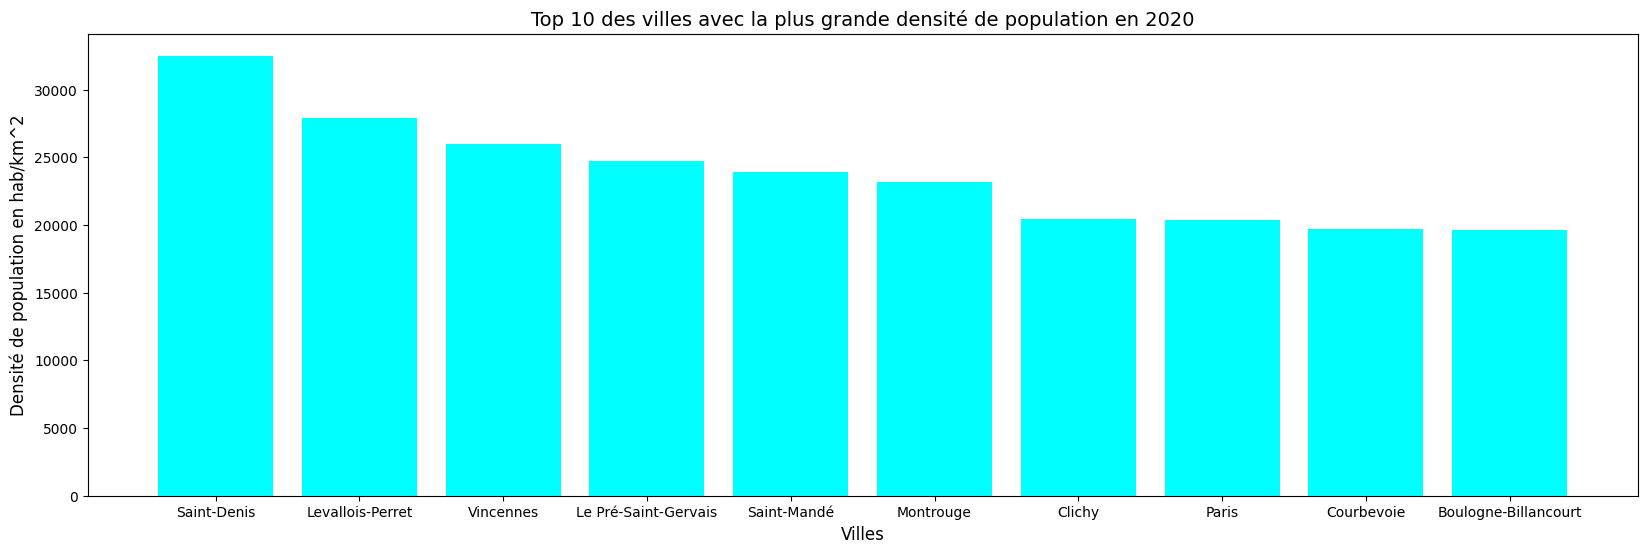

In [18]:
question7MAX= """
SELECT c.nomCommune, (SUM(p.population) / c.superficie) AS densite_population
FROM Commune c
	JOIN Population p ON c.codeCommune = p.nomCommune
WHERE NOT (
    (c.codeCommune BETWEEN '75101' AND '75120') -- Arrondissements de Paris
    OR (c.codeCommune BETWEEN '13201' AND '13216') -- Arrondissements de Marseille
    OR (c.codeCommune BETWEEN '69381' AND '69389') -- Arrondissements de Lyon
)
AND c.superficie > 0 -- Évite la division par zéro
AND p.annee = 2020
GROUP BY c.nomCommune
ORDER BY densite_population DESC
LIMIT 10;
"""
dataMAX = pd.read_sql_query(question7MAX, engine)
print(dataMAX.head())

plt.figure(figsize=(20,6))
plt.bar(dataMAX['nomCommune'], dataMAX['densite_population'], color='cyan', label='densite_population')
plt.xlabel('Villes', fontsize=12)
plt.ylabel('Densité de population en hab/km^2', fontsize=12)
plt.title("Top 10 des villes avec la plus grande densité de population en 2020", fontsize=14)
plt.show()

      nomCommune  densite_population
0           Saül            0.034190
1     Saint-Élie            0.042958
2         Régina            0.069580
3  Rochefourchat            0.078493
4      Majastres            0.134003


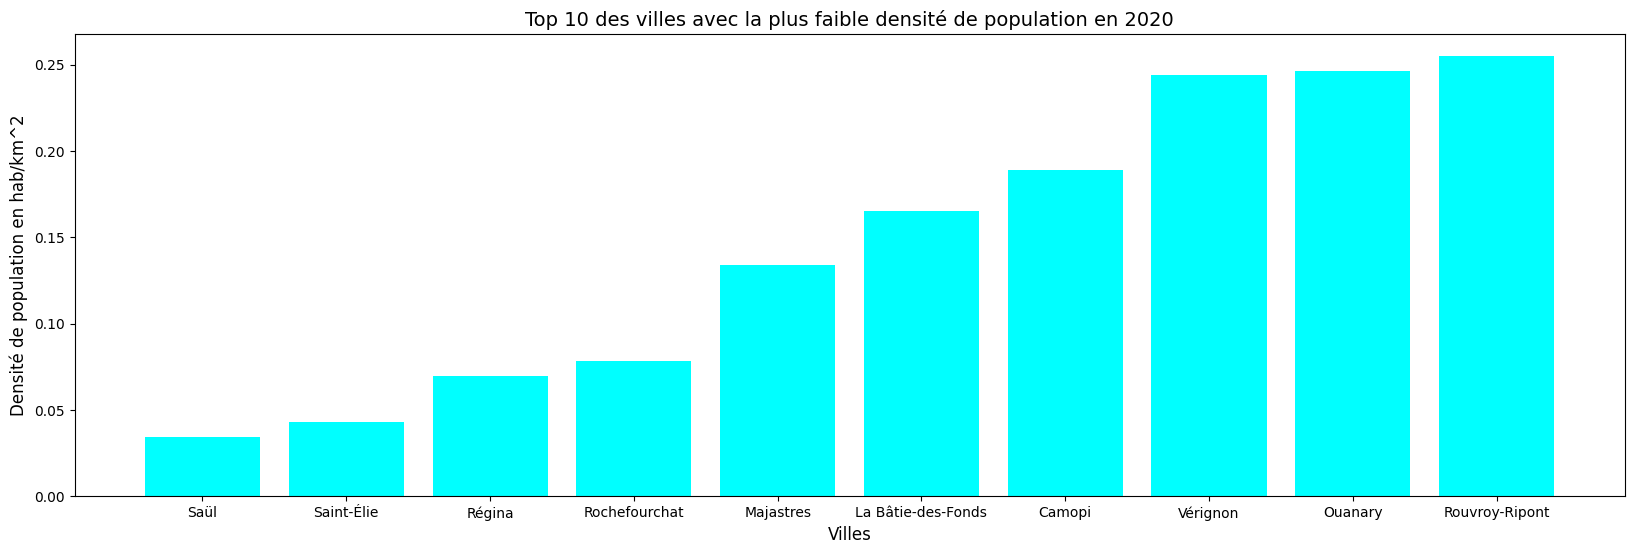

In [20]:
question7MIN= """
SELECT c.nomCommune, (SUM(p.population) / c.superficie) AS densite_population
FROM Commune c
	JOIN Population p ON c.codeCommune = p.nomCommune
WHERE NOT (
    (c.codeCommune BETWEEN '75101' AND '75120') -- Arrondissements de Paris
    OR (c.codeCommune BETWEEN '13201' AND '13216') -- Arrondissements de Marseille
    OR (c.codeCommune BETWEEN '69381' AND '69389') -- Arrondissements de Lyon
)
AND c.superficie > 0 
AND p.population >0
AND p.annee = 2020
GROUP BY c.nomCommune
ORDER BY densite_population ASC
LIMIT 10;
"""
dataMIN = pd.read_sql_query(question7MIN, engine)
print(dataMIN.head())

plt.figure(figsize=(20,6))
plt.bar(dataMIN['nomCommune'], dataMIN['densite_population'], color='cyan', label='densite_population')
plt.xlabel('Villes', fontsize=12)
plt.ylabel('Densité de population en hab/km^2', fontsize=12)
plt.title("Top 10 des villes avec la plus faible densité de population en 2020", fontsize=14)
plt.show()

           nomDepart  densite_population
0              Paris        20359.639469
1     Hauts-de-Seine         9260.366722
2  Seine-Saint-Denis         7008.560542
3       Val-de-Marne         5746.120883
4         Val-d'Oise         1004.730679


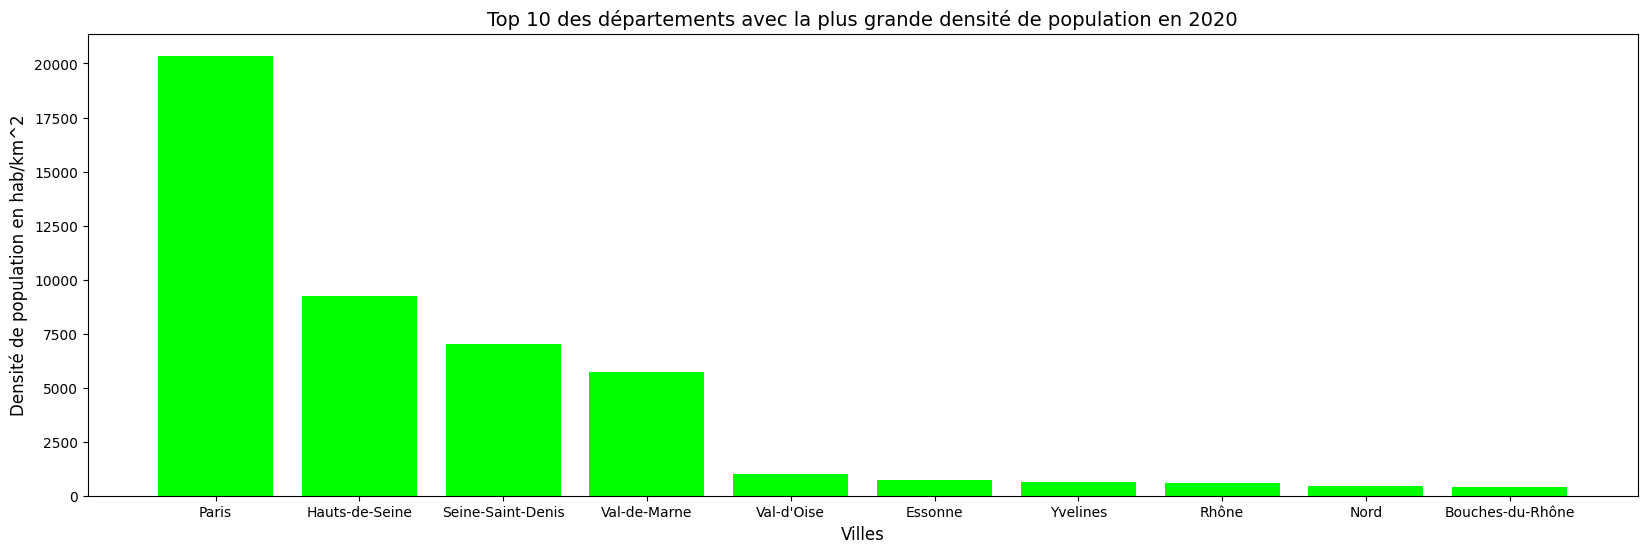

In [22]:
question7DepartMAX= """
SELECT d.nomDepart, (SUM(p.population) / SUM(c.superficie)) AS densite_population
FROM Departement d 
	JOIN Commune c ON d.codeDepart = c.code_departement 
	JOIN Population p ON c.codeCommune = p.nomCommune
WHERE NOT (
    (c.codeCommune BETWEEN '75101' AND '75120') -- Arrondissements de Paris
    OR (c.codeCommune BETWEEN '13201' AND '13216') -- Arrondissements de Marseille
    OR (c.codeCommune BETWEEN '69381' AND '69389') -- Arrondissements de Lyon
)
AND c.superficie > 0 -- Évite la division par zéro
AND p.annee = 2020
GROUP BY d.nomDepart
ORDER BY densite_population DESC
LIMIT 10;
"""
dataMAX = pd.read_sql_query(question7DepartMAX, engine)
print(dataMAX.head())

plt.figure(figsize=(20,6))
plt.bar(dataMAX['nomDepart'], dataMAX['densite_population'], color='lime', label='densite_population')
plt.xlabel('Villes', fontsize=12)
plt.ylabel('Densité de population en hab/km^2', fontsize=12)
plt.title("Top 10 des départements avec la plus grande densité de population en 2020", fontsize=14)
plt.show()

                 nomDepart  densite_population
0                   Guyane            3.413381
1                   Lozère           14.831581
2                   Creuse           20.842243
3  Alpes-de-Haute-Provence           23.891082
4                   Cantal           25.214723


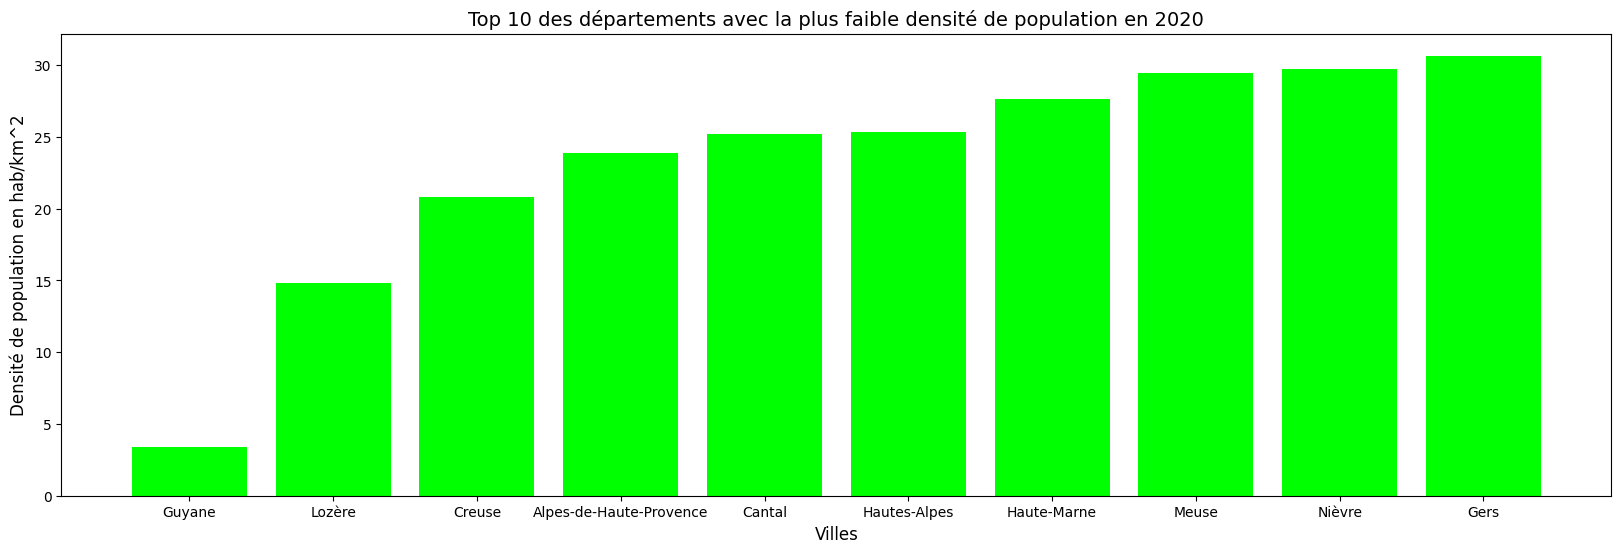

In [23]:
question7DepartMIN ="""
SELECT d.nomDepart, (SUM(p.population) / SUM(c.superficie)) AS densite_population
FROM Departement d 
	JOIN Commune c ON d.codeDepart = c.code_departement
	JOIN Population p ON c.codeCommune = p.nomCommune
WHERE NOT (
    (c.codeCommune BETWEEN '75101' AND '75120') -- Arrondissements de Paris
    OR (c.codeCommune BETWEEN '13201' AND '13216') -- Arrondissements de Marseille
    OR (c.codeCommune BETWEEN '69381' AND '69389') -- Arrondissements de Lyon
)
AND c.superficie > 0 -- Évite la division par zéro
AND p.annee = 2020
GROUP BY d.nomDepart
ORDER BY densite_population ASC
LIMIT 10;
"""
dataMIN = pd.read_sql_query(question7DepartMIN, engine)
print(dataMIN.head())

plt.figure(figsize=(20,6))
plt.bar(dataMIN['nomDepart'], dataMIN['densite_population'], color='lime', label='densite_population')
plt.xlabel('Villes', fontsize=12)
plt.ylabel('Densité de population en hab/km^2', fontsize=12)
plt.title("Top 10 des départements avec la plus faible densité de population en 2020", fontsize=14)
plt.show()

          nomDepart  Naissance_entre_2014_2020  Deces_entre_2014_2020  \
0    Seine-et-Marne                   113505.0                54445.0   
1     Haute-Garonne                    96913.0                56568.0   
2           Gironde                   102532.0                79410.0   
3           Hérault                    76260.0                62638.0   
4           Essonne                   112441.0                47318.0   
5  Loire-Atlantique                    98013.0                67855.0   
6          Yvelines                   113286.0                54107.0   
7               Var                    63817.0                69792.0   
8  Bouches-du-Rhône                   155131.0               107221.0   
9        Val-d'Oise                   117962.0                44061.0   

   Mouvements_Population_depuis_1968  
0                           765236.0  
1                           684700.0  
2                           603879.0  
3                           583954.0  
4

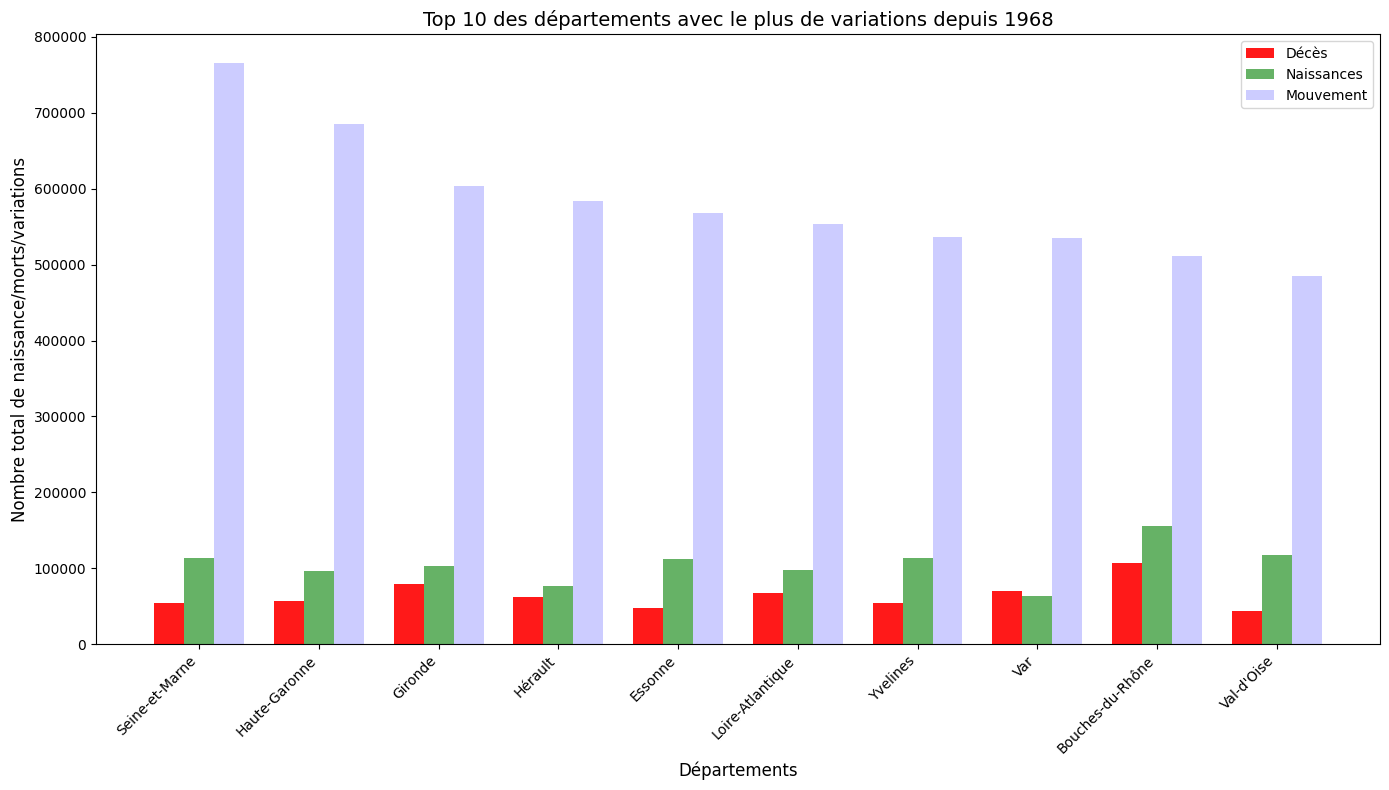

In [43]:
question8Depart ="""
WITH pop2020 AS (
    SELECT SUM(p.population) AS pop_2020, d.nomDepart
    FROM Population p
    JOIN Commune c ON p.nomCommune = c.codeCommune
    JOIN Departement d ON c.code_departement = d.codeDepart
    WHERE p.annee = 2020
    GROUP BY d.nomDepart
),
pop1968 AS (
    SELECT SUM(p.population) AS pop_1968, d.nomDepart
    FROM Population p
    JOIN Commune c ON p.nomCommune = c.codeCommune
    JOIN Departement d ON c.code_departement = d.codeDepart
    WHERE p.annee = 1968
    GROUP BY d.nomDepart
)
SELECT 
    d.nomDepart, SUM(CASE WHEN e.categorie = 'Naissance' THEN e.nombre ELSE 0 END) AS Naissance_entre_2014_2020,
    SUM(CASE WHEN e.categorie = 'Deces' THEN e.nombre ELSE 0 END) AS Deces_entre_2014_2020,
    (pop2020.pop_2020 - pop1968.pop_1968) - 
    (SUM(CASE WHEN e.categorie = 'Naissance' THEN e.nombre ELSE 0 END) - 
     SUM(CASE WHEN e.categorie = 'Deces' THEN e.nombre ELSE 0 END)) AS Mouvements_Population_depuis_1968
FROM Departement d
	JOIN Commune c ON d.codeDepart = c.code_departement
	JOIN Evenement e ON c.codeCommune = e.nomCommune
	JOIN pop2020 ON d.nomDepart = pop2020.nomDepart
	JOIN pop1968 ON d.nomDepart = pop1968.nomDepart
WHERE NOT (
    (c.codeCommune BETWEEN '75101' AND '75120') -- Arrondissements de Paris
    OR (c.codeCommune BETWEEN '13201' AND '13216') -- Arrondissements de Marseille
    OR (c.codeCommune BETWEEN '69381' AND '69389') -- Arrondissements de Lyon
)
AND e.periode ='2014-2020' 
GROUP BY d.nomDepart
ORDER BY Mouvements_Population_depuis_1968 DESC;
"""
data = pd.read_sql_query(question8Depart, engine)
data=(data.head(10))
print(data)

# Création d'un graphique
fig, ax = plt.subplots(figsize=(14, 8))
# Largeur des barres
bar_width = 0.25

# Indices pour positionner les barres
indices = range(len(data))

# Bar plot pour les décès (position normale)
ax.bar([i - bar_width for i in indices], data['Deces_entre_2014_2020'], bar_width, color='red', alpha=0.9, label='Décès')

# Bar plot pour les naissances (décalée vers la gauche)
ax.bar([i for i in indices], data['Naissance_entre_2014_2020'], bar_width, color='green', alpha=0.6, label='Naissances')

# Bar plot pour les variations de population (décalée vers la droite)
ax.bar([i + bar_width for i in indices], data['Mouvements_Population_depuis_1968'], bar_width, color='blue', alpha=0.2, label='Mouvement')

# Ajout des labels et du titre
ax.set_xlabel('Départements', fontsize=12)
ax.set_ylabel('Nombre total de naissance/morts/variations', fontsize=12)
ax.set_title("Top 10 des départements avec le plus de variations depuis 1968", fontsize=14)

# Rotation des labels de l'axe des x pour une meilleure lisibilité
plt.xticks(indices, data['nomDepart'], rotation=45, ha='right')

# Ajouter une légende pour clarifier les couleurs
ax.legend()

# Affichage du graphique
plt.tight_layout()
plt.show()

                    nomRegion  Naissance_entre_2014_2020  \
0               Île-de-France                  8516760.0   
1        Auvergne-Rhône-Alpes                  6634608.0   
2                   Occitanie                  4659460.0   
3          Nouvelle-Aquitaine                  3995316.0   
4                   Grand Est                  3478910.0   
5  Provence-Alpes-Côte d'Azur                  2078148.0   
6             Hauts-de-France                  2162855.0   
7     Bourgogne-Franche-Comté                  1345816.0   
8            Pays de la Loire                  1230190.0   
9                   Normandie                  1061420.0   

   Deces_entre_2014_2020  Mouvements_Population_depuis_1968  
0              3572696.0                         98676487.0  
1              4860744.0                         96178070.0  
2              4512794.0                         74435685.0  
3              4573716.0                         69454647.0  
4              3128590.0     

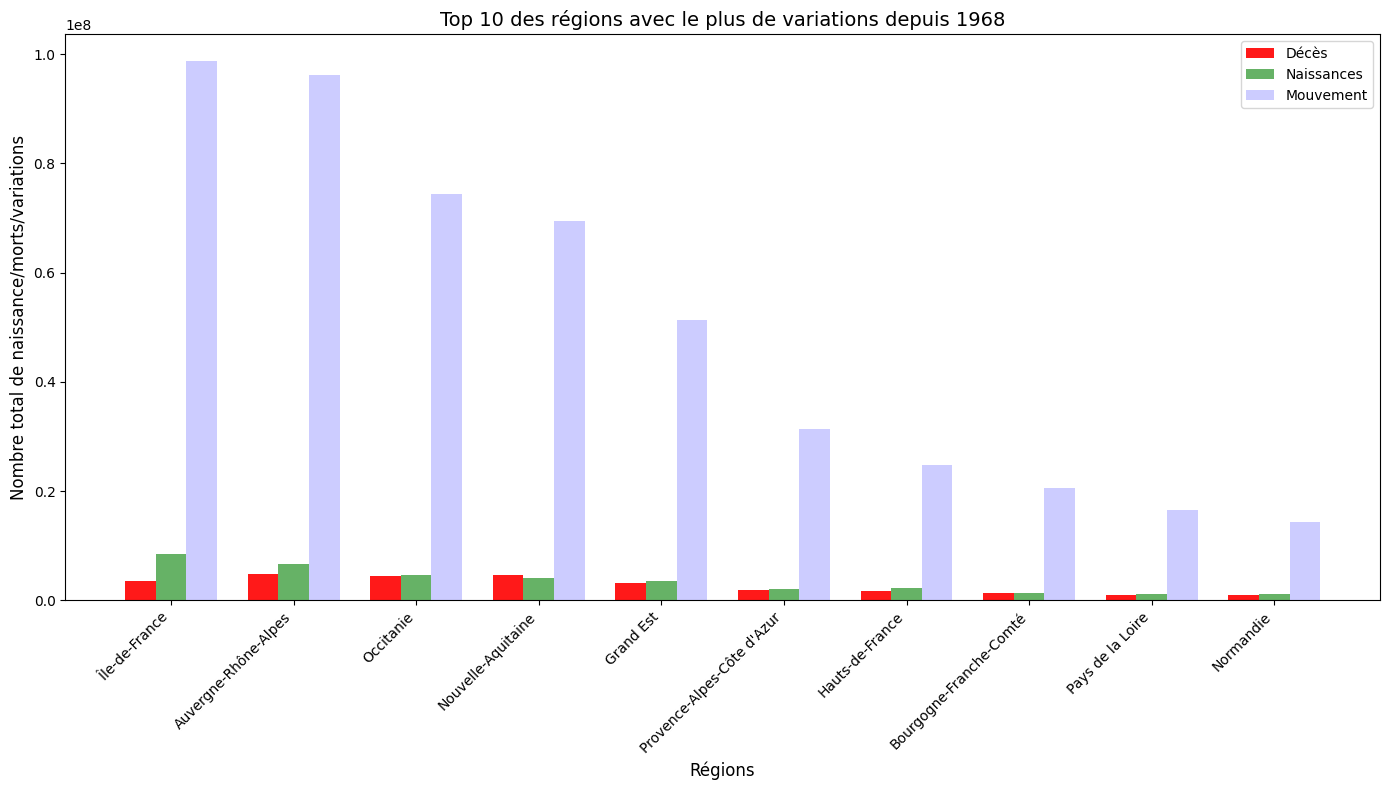

In [46]:
question8Region ="""
WITH pop2020 AS (
    SELECT SUM(p.population) AS pop_2020, r.nomRegion
    FROM Population p
		JOIN Commune c ON p.nomCommune = c.codeCommune
		JOIN Departement d ON c.code_departement = d.codeDepart
		JOIN Region r ON d.codeRegion = r.codeRegion
    WHERE p.annee = 2020
    GROUP BY r.nomRegion
),
pop1968 AS (
    SELECT SUM(DISTINCT p.population) AS pop_1968, r.nomRegion
    FROM Population p
    JOIN Commune c ON p.nomCommune = c.codeCommune
    JOIN Departement d ON c.code_departement = d.codeDepart
    JOIN Region r ON d.codeRegion = r.codeRegion
    WHERE p.annee = 1968
    GROUP BY r.nomRegion
)
SELECT 
    r.nomRegion, SUM(CASE WHEN e.categorie = 'Naissance' THEN e.nombre ELSE 0 END) AS Naissance_entre_2014_2020,
    SUM(CASE WHEN e.categorie = 'Deces' THEN e.nombre ELSE 0 END) AS Deces_entre_2014_2020,
    (pop2020.pop_2020 - pop1968.pop_1968) - 
    (SUM(CASE WHEN e.categorie = 'Naissance' THEN e.nombre ELSE 0 END) - 
     SUM(CASE WHEN e.categorie = 'Deces' THEN e.nombre ELSE 0 END)) AS Mouvements_Population_depuis_1968
FROM Region r
	JOIN Departement d ON r.codeRegion = d.codeRegion
	JOIN Commune c ON d.codeDepart = c.code_departement
	JOIN Evenement e ON c.codeCommune = e.nomCommune
	JOIN pop2020 ON r.nomRegion = pop2020.nomRegion
	JOIN pop1968 ON r.nomRegion = pop1968.nomRegion
WHERE NOT (
    (c.codeCommune BETWEEN '75101' AND '75120') -- Arrondissements de Paris
    OR (c.codeCommune BETWEEN '13201' AND '13216') -- Arrondissements de Marseille
    OR (c.codeCommune BETWEEN '69381' AND '69389') -- Arrondissements de Lyon
)
AND e.periode = '2014-2020'
GROUP BY r.nomRegion
ORDER BY Mouvements_Population_depuis_1968 DESC;
"""
data = pd.read_sql_query(question8Region, engine)
data=(data.head(10))
print(data)

# Création d'un graphique
fig, ax = plt.subplots(figsize=(14, 8))
# Largeur des barres
bar_width = 0.25

# Indices pour positionner les barres
indices = range(len(data))

# Bar plot pour les décès (position normale)
ax.bar([i - bar_width for i in indices], data['Deces_entre_2014_2020'], bar_width, color='red', alpha=0.9, label='Décès')

# Bar plot pour les naissances (décalée vers la gauche)
ax.bar([i for i in indices], data['Naissance_entre_2014_2020'], bar_width, color='green', alpha=0.6, label='Naissances')

# Bar plot pour les variations de population (décalée vers la droite)
ax.bar([i + bar_width for i in indices], data['Mouvements_Population_depuis_1968'], bar_width, color='blue', alpha=0.2, label='Mouvement')

# Ajout des labels et du titre
ax.set_xlabel('Régions', fontsize=12)
ax.set_ylabel('Nombre total de naissance/morts/variations', fontsize=12)
ax.set_title("Top 10 des régions avec le plus de variations depuis 1968", fontsize=14)

# Rotation des labels de l'axe des x pour une meilleure lisibilité
plt.xticks(indices, data['nomRegion'], rotation=45, ha='right')

# Ajouter une légende pour clarifier les couleurs
ax.legend()

# Affichage du graphique
plt.tight_layout()
plt.show()

     Pays  Naissance_entre_2014_2020  Deces_entre_2014_2020  \
0  France                  4905823.0              3707670.0   

   Mouvements_Population_depuis_1968  
0                         14696744.0  


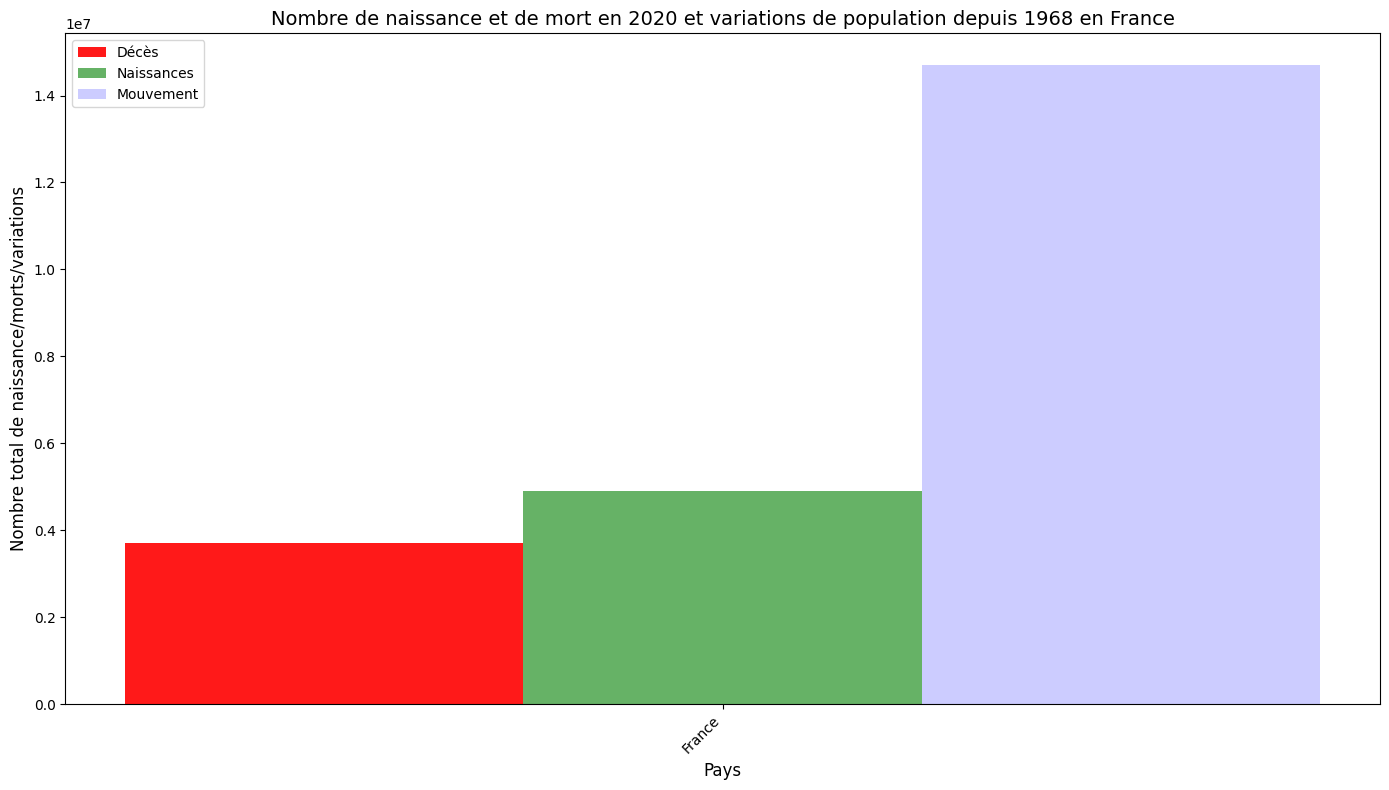

In [49]:
question9 ="""
 WITH pop2020 AS (
    SELECT SUM(population) AS pop_2020
    FROM Population p
    JOIN Commune c ON p.nomCommune = c.codeCommune
    WHERE annee = 2020
),
pop1968 AS (
    SELECT SUM(population) AS pop_1968
    FROM Population p
    JOIN Commune c ON p.nomCommune = c.codeCommune
    WHERE annee = 1968
)
SELECT 'France' AS Pays, SUM(CASE WHEN e.categorie = 'Naissance' THEN e.nombre ELSE 0 END) AS Naissance_entre_2014_2020,
    SUM(CASE WHEN e.categorie = 'Deces' THEN e.nombre ELSE 0 END) AS Deces_entre_2014_2020,
    (pop2020.pop_2020 - pop1968.pop_1968) - 
    (SUM(CASE WHEN e.categorie = 'Naissance' THEN e.nombre ELSE 0 END) - 
     SUM(CASE WHEN e.categorie = 'Deces' THEN e.nombre ELSE 0 END)) AS Mouvements_Population_depuis_1968
FROM Commune c
	JOIN Evenement e ON c.codeCommune = e.nomCommune
    JOIN pop2020 ON 1=1  -- Jointure pour récupérer la population de 2020
    JOIN pop1968 ON 1=1  -- Jointure pour récupérer la population de 1968
WHERE e.periode = '2014-2020'
GROUP BY Pays;
"""
data = pd.read_sql_query(question9, engine)
data=(data.head(10))
print(data)

# Création d'un graphique
fig, ax = plt.subplots(figsize=(14, 8))
# Largeur des barres
bar_width = 0.25

# Indices pour positionner les barres
indices = range(len(data))

# Bar plot pour les décès (position normale)
ax.bar([i - bar_width for i in indices], data['Deces_entre_2014_2020'], bar_width, color='red', alpha=0.9, label='Décès')

# Bar plot pour les naissances (décalée vers la gauche)
ax.bar([i for i in indices], data['Naissance_entre_2014_2020'], bar_width, color='green', alpha=0.6, label='Naissances')

# Bar plot pour les variations de population (décalée vers la droite)
ax.bar([i + bar_width for i in indices], data['Mouvements_Population_depuis_1968'], bar_width, color='blue', alpha=0.2, label='Mouvement')

# Ajout des labels et du titre
ax.set_xlabel('Pays', fontsize=12)
ax.set_ylabel('Nombre total de naissance/morts/variations', fontsize=12)
ax.set_title("Nombre de naissance et de mort en 2020 et variations de population depuis 1968 en France", fontsize=14)

# Rotation des labels de l'axe des x pour une meilleure lisibilité
plt.xticks(indices, data['Pays'], rotation=45, ha='right')

# Ajouter une légende pour clarifier les couleurs
ax.legend()

# Affichage du graphique
plt.tight_layout()
plt.show()

In [52]:
RequeteBonus1 = """
WITH Naissances AS (
    SELECT SUM(e.nombre) AS total_naissances
    FROM Evenement e
    WHERE e.categorie = 'Naissance' 
    AND e.periode ='2014-2020'
),
Deces AS (
    SELECT SUM(e.nombre) AS total_deces
    FROM Evenement e
    WHERE e.categorie = 'Deces'
    AND e.periode = '2014-2020'
),
PopulationTotale AS (
    SELECT SUM(p.population) AS population_totale
    FROM Population p
    WHERE p.annee = 2020
)
SELECT (n.total_naissances - d.total_deces) / p.population_totale AS taux_renouvellement
FROM Naissances n, Deces d, PopulationTotale p;
"""
data = pd.read_sql_query(RequeteBonus1, engine)
print(data)

   taux_renouvellement
0             0.016947


    nomCommune         nomDepart  population
0        Paris             Paris     2234105
1    Marseille  Bouches-du-Rhône      850602
2         Lyon             Rhône      479803
3     Toulouse     Haute-Garonne      440204
4         Nice   Alpes-Maritimes      340735
5       Nantes  Loire-Atlantique      282047
6   Strasbourg          Bas-Rhin      271708
7  Montpellier           Hérault      255080
8     Bordeaux           Gironde      236725
9        Lille              Nord      226827


C:\Users\anton\AppData\Local\Temp\ipykernel_15420\2654744913.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  departement_colors = {depart: color for depart, color in zip(data['nomDepart'].unique(), plt.cm.get_cmap('tab10', len(data['nomDepart'].unique()))(range(len(data['nomDepart'].unique()))))}


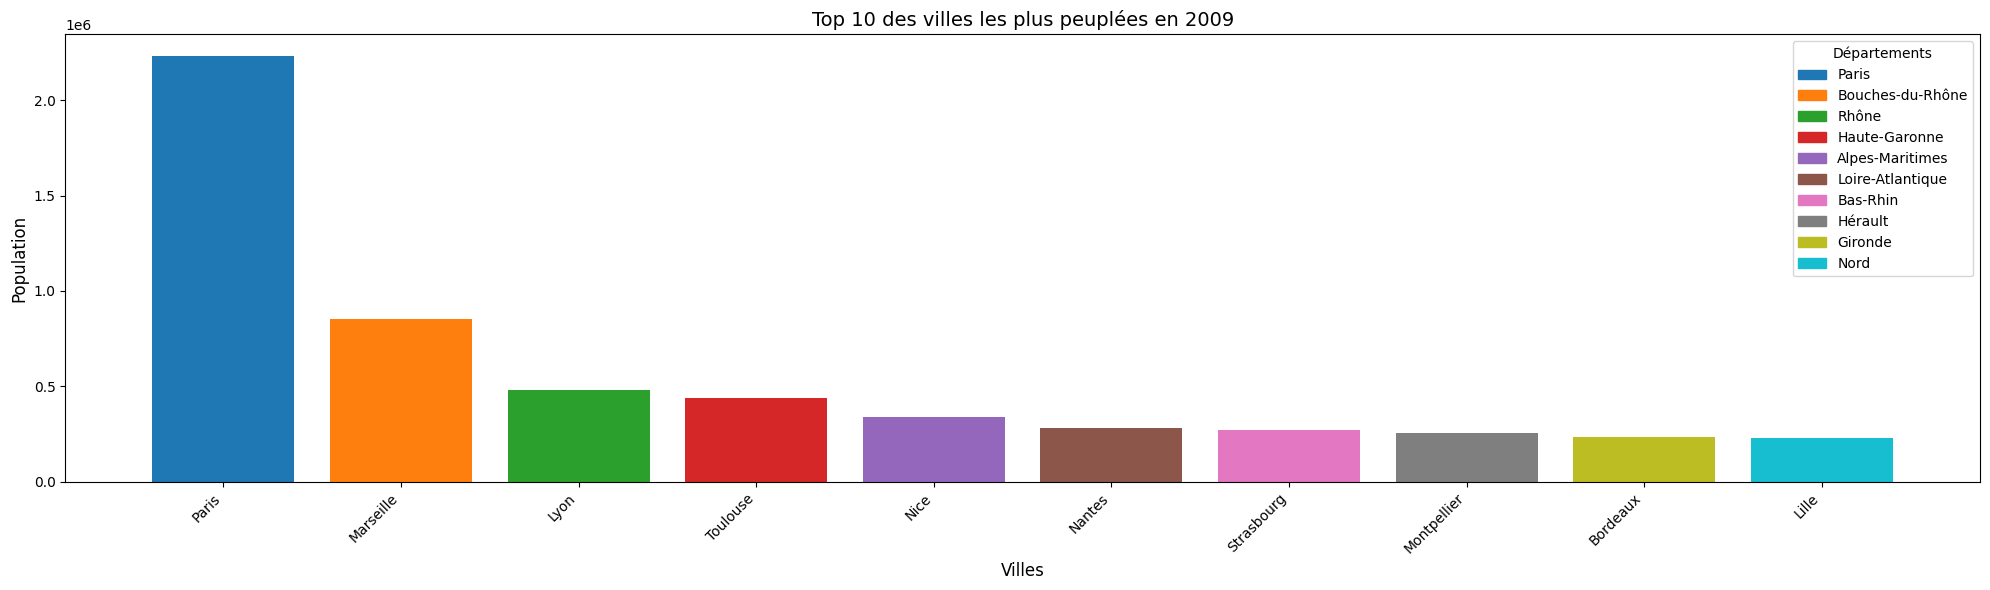

In [55]:
RequeteBonus2="""
SELECT c.nomCommune, d.nomDepart, p.population
FROM Commune c
	JOIN Departement d ON c.code_departement = d.codeDepart
	JOIN Population p ON p.nomCommune = c.codeCommune
WHERE NOT (
    (c.codeCommune BETWEEN '75101' AND '75120') -- Arrondissements de Paris
    OR (c.codeCommune BETWEEN '13201' AND '13216') -- Arrondissements de Marseille
    OR (c.codeCommune BETWEEN '69381' AND '69389') -- Arrondissements de Lyon
)
AND p.annee = 2009
ORDER BY p.population DESC
LIMIT 10;
"""
data = pd.read_sql_query(RequeteBonus2, engine)
print(data)

# Attribuer une couleur à chaque département
# On crée un dictionnaire qui associe chaque département à une couleur
departement_colors = {depart: color for depart, color in zip(data['nomDepart'].unique(), plt.cm.get_cmap('tab10', len(data['nomDepart'].unique()))(range(len(data['nomDepart'].unique()))))}

# Ajouter une colonne 'couleur' à notre dataframe en fonction du département
data['couleur'] = data['nomDepart'].map(departement_colors)

# Création du graphique
plt.figure(figsize=(20,6))

# Bar plot avec couleur par département
plt.bar(data['nomCommune'], data['population'], color=data['couleur'])

# Ajout des labels et du titre
plt.xlabel('Villes', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.title("Top 10 des villes les plus peuplées en 2009", fontsize=14)

# Affichage de la légende en fonction des départements
handles = [plt.Rectangle((0,0),1,1, color=departement_colors[depart]) for depart in departement_colors]
labels = list(departement_colors.keys())
plt.legend(handles, labels, title='Départements')

# Affichage du graphique
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



       nomCommune  occurrences
0  Sainte-Colombe           12
1   Saint-Sauveur           11
2     Saint-Aubin           10
3        Beaulieu           10
4    Saint-Marcel            9
5      Saint-Rémy            9
6    Saint-Michel            9
7          Le Pin            9
8    Sainte-Marie            9
9      Saint-Paul            9


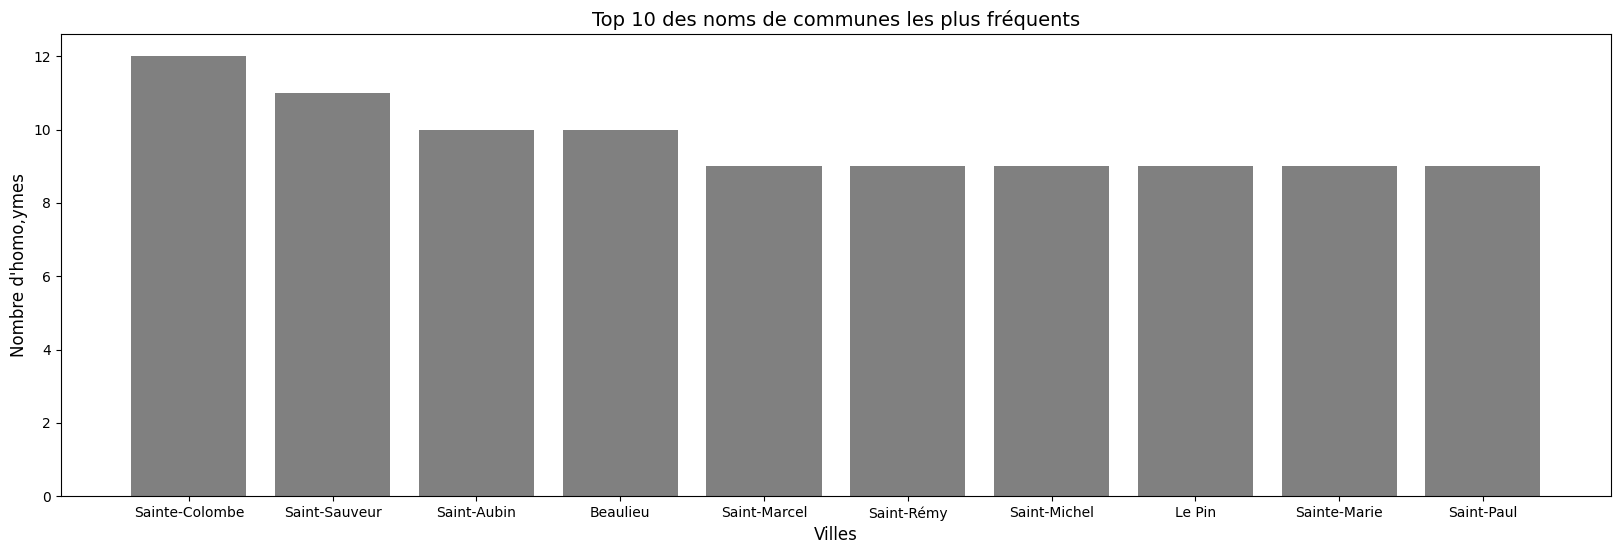

In [62]:
RequeteBonus3="""
SELECT c.nomCommune, COUNT(*) AS occurrences
FROM Commune c
GROUP BY c.nomCommune -- va afficher le nombre de count pour le nom de chaque commune
HAVING COUNT(*) > 1 -- affiche seulement les communes qui ont un nom existant plusieurs fois 
ORDER BY occurrences DESC
LIMIT 10;
"""
data = pd.read_sql_query(RequeteBonus3, engine)
print(data)

plt.figure(figsize=(20,6))
plt.bar(data['nomCommune'], data['occurrences'], color='gray', label='homonymes')
plt.xlabel('Villes', fontsize=12)
plt.ylabel('Nombre d\'homo,ymes', fontsize=12)
plt.title("Top 10 des noms de communes les plus fréquents", fontsize=14)
plt.show()

Moyenne globale des superficies : 18.102426443256164
Moyenne globale des populations : 2021.5769
             nomCommune  superficie  population  quotient_population  \
0    Prads-Haute-Bléone      165.64         177            11.421338   
1  Saint-Paul-sur-Ubaye      205.55         177            11.421338   
2                  Saül     4475.00         153            13.212921   
3                 Aston      153.80         203             9.958507   
4                Larrau      126.80         194            10.420499   
5            Saint-Élie     5680.00         244             8.285151   

   quotient_superficie  
0             9.150155  
1            11.354831  
2           247.204429  
3             8.496099  
4             7.004586  
5           313.770091  


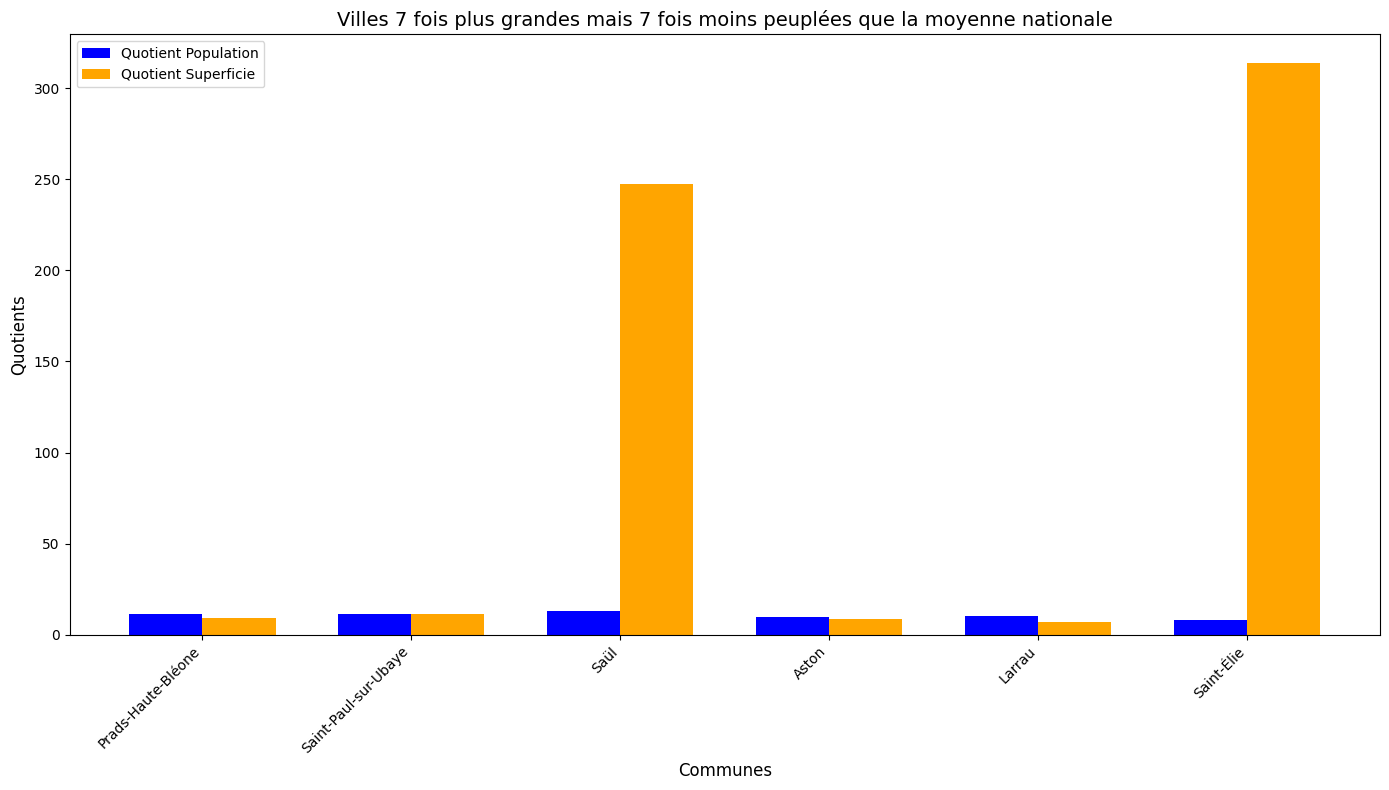

In [ ]:
RequeteMoyennes = """
SELECT AVG(c.superficie) AS avg_superficie, AVG(p.population) AS avg_population
FROM Commune c
JOIN Population p ON c.codeCommune = p.nomCommune
WHERE p.annee = 2020;
"""
moyennes = pd.read_sql_query(RequeteMoyennes, engine)
avg_superficie = moyennes['avg_superficie'].iloc[0]
avg_population = moyennes['avg_population'].iloc[0]

print(f"Moyenne globale des superficies : {avg_superficie}")
print(f"Moyenne globale des populations : {avg_population}")

RequeteBonus4="""
SELECT (c.nomCommune), c.superficie, p.population
FROM Commune c 
	JOIN Population p ON c.codeCommune = p.nomCommune
WHERE c.superficie > 7*(SELECT AVG(superficie) 
					FROM Commune)
AND p.population < (1/7)*(SELECT AVG(population) 
				  FROM Population)
AND p.annee = 2020;
"""
data = pd.read_sql_query(RequeteBonus4, engine)
data['quotient_population'] = avg_population/data['population']
data['quotient_superficie'] = data['superficie'] / avg_superficie

print(data)

x = np.arange(len(data['nomCommune']))
width = 0.35  # Largeur des barres

# Création de la figure
fig, ax = plt.subplots(figsize=(14, 8))

# Bar plot pour le quotient des populations
bar1 = ax.bar(x - width/2, data['quotient_population'], width, label='Quotient Population', color='blue')

# Bar plot pour le quotient des superficies
bar2 = ax.bar(x + width/2, data['quotient_superficie'], width, label='Quotient Superficie', color='orange')

# Ajout des labels, du titre et des ticks
ax.set_xlabel('Communes', fontsize=12)
ax.set_ylabel('Quotients', fontsize=12)
ax.set_title('Villes 7 fois plus grandes mais 7 fois moins peuplées que la moyenne nationale', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(data['nomCommune'], rotation=45, ha='right')

# Ajout de la légende
ax.legend()

# Affichage du graphique
plt.tight_layout()
plt.show()

          nomDepart  population_totale
0  Bouches-du-Rhône          2048070.0
1              Nord          2607746.0
2             Paris          2145906.0


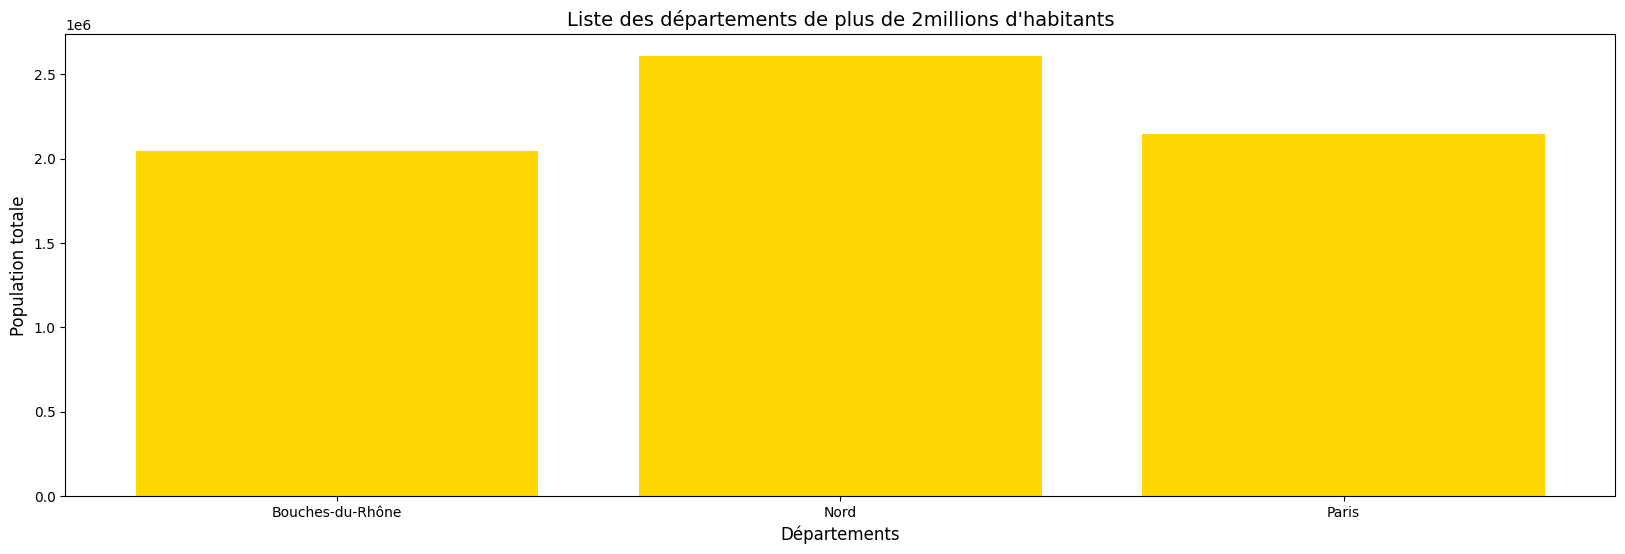

In [80]:
RequeteBonus5="""
SELECT d.nomDepart, SUM(p.population) AS population_totale
FROM Population p 
	JOIN Commune c ON p.nomCommune = c.codeCommune
	JOIN Departement d ON c.code_departement = d.codeDepart
WHERE NOT (
    (c.codeCommune BETWEEN '75101' AND '75120') -- Arrondissements de Paris
    OR (c.codeCommune BETWEEN '13201' AND '13216') -- Arrondissements de Marseille
    OR (c.codeCommune BETWEEN '69381' AND '69389') -- Arrondissements de Lyon
)
AND p.annee = '2020'
GROUP BY d.nomDepart
HAVING population_totale > 2000000;
"""
data = pd.read_sql_query(RequeteBonus5, engine)
print(data)


# Affichage du graphique
plt.figure(figsize=(20,6))
plt.bar(data['nomDepart'], data['population_totale'], color='gold', label='population')
plt.xlabel('Départements', fontsize=12)
plt.ylabel('Population totale', fontsize=12)
plt.title("Liste des départements de plus de 2millions d'habitants", fontsize=14)
plt.show()